In [2]:
# Imports
import pandas as pd
import numpy as np
import json as json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
 # Loading the data from CSV into panadas dataframe
tempIncomeStatement = pd.read_csv (r'../data/income_statement.csv', sep=',')
tempCashFlow = pd.read_csv (r'../data/cash_flow.csv', sep=',')
tempBalanceSheet = pd.read_csv (r'../data/balance-sheet.csv', sep=',')
tempEarnings = pd.read_csv (r'../data/EARNINGS.csv', sep=',')

tempMonthly = pd.read_csv (r'../data/monthly-data.csv', sep=',')
TickerSymbols = pd.read_csv (r'../data/nasdaq_screener_sorted_values.csv', sep=',')

In [4]:
# Printing Income statement
print(tempIncomeStatement)
print(tempIncomeStatement.columns)

# Printing Cash Flow
print(tempCashFlow.shape)
print(tempCashFlow.columns)

# Printing Balance Sheet
print(tempBalanceSheet.shape)
print(tempBalanceSheet.columns)

# Printing Earnings
print(tempEarnings.shape)
print(tempEarnings.columns)

     fiscalDateEnding reportedCurrency  grossProfit  totalRevenue  \
0          2021-09-30              USD  35174000000   82688000000   
1          2021-06-30              USD  35255000000   80769000000   
2          2021-03-31              USD  38079000000   88914000000   
3          2020-12-31              USD  44328000000  110801000000   
4          2020-09-30              USD  24689000000   64698000000   
...               ...              ...          ...           ...   
3899       2017-05-31              USD    345500000     572700000   
3900       2017-02-28              USD    325900000     566400000   
3901       2016-11-30              USD    356900000     623700000   
3902       2016-08-31              USD    326900000     597300000   
3903       2016-05-31              USD    248800000     710500000   

     costOfRevenue costofGoodsAndServicesSold operatingIncome  \
0      53802000000                48186000000     23786000000   
1      51591000000                4617900

In [5]:
# renaming Balance sheet column "fiscalDateEnding" to "timestamp" to match column name on both dataframes
tempIncomeStatement = tempIncomeStatement.rename(columns={"fiscalDateEnding": "timestamp"})
tempCashFlow = tempCashFlow.rename(columns={"fiscalDateEnding": "timestamp"})
tempBalanceSheet = tempBalanceSheet.rename(columns={"fiscalDateEnding": "timestamp"})
tempEarnings = tempEarnings.rename(columns={"fiscalDateEnding": "timestamp"})

# Merging all 4 frames into one

# Daily dates does not overlap on both dataframes, CompanyMonthly has the last trading day (not including weekends)
# While CompanyBalanaceSheet always has the last day of the month (including weekends)
# We need to cut out the daily date for both dataframes["timestamp"], to be able to merge them properly.
# Slicing the timestamp in CompanyMonthly, removing the days
sliceMonthly = tempMonthly["timestamp"].str.slice(0, -3)
tempMonthly["timestamp"] = sliceMonthly

# Printing
print("Monthly Data:")
print(tempMonthly["timestamp"])

# Slicing the timestamp in Income Statement, removing the days
sliceIncomestatement = tempIncomeStatement["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempIncomeStatement["timestamp"] = sliceIncomestatement

# Slicing the timestamp in Cash Flow, removing the days
sliceCashFlow = tempCashFlow["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempCashFlow["timestamp"] = sliceCashFlow

# Slicing the timestamp in CompanyBalanceSheet, removing the days
sliceBalanceSheet = tempBalanceSheet["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempBalanceSheet["timestamp"] = sliceBalanceSheet

# Slicing the timestamp in Earnings, removing the days
sliceEarnings = tempEarnings["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempEarnings["timestamp"] = sliceEarnings

# Printing
print("Income Statement:")
print(tempIncomeStatement["timestamp"])
print("Cash Flow:")
print(tempCashFlow["timestamp"])
print("Balance Sheet:")
print(tempBalanceSheet["timestamp"])
print("Earnings:")
print(tempEarnings["timestamp"])
print("Ticker Symbols:")
print(TickerSymbols["Symbol"])
    

Monthly Data:
0        2021-11
1        2021-10
2        2021-09
3        2021-08
4        2021-07
          ...   
43662    2000-11
43663    2000-10
43664    2000-09
43665    2000-08
43666    2000-07
Name: timestamp, Length: 43667, dtype: object
Income Statement:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3899    2017-05
3900    2017-02
3901    2016-11
3902    2016-08
3903    2016-05
Name: timestamp, Length: 3904, dtype: object
Cash Flow:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3880    2017-05
3881    2017-02
3882    2016-11
3883    2016-08
3884    2016-05
Name: timestamp, Length: 3885, dtype: object
Balance Sheet:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3852    2017-05
3853    2017-02
3854    2016-11
3855    2016-08
3856    2016-05
Name: timestamp, Length: 3857, dtype: object
Earnings:
0        2021-09
1        2021-06
2 

In [6]:
# for each company we want to make adjustments needed for each companys features and then we will merge them into one df
TickerSymbols = TickerSymbols[~TickerSymbols['Symbol'].isin(['RIVN'])]
final_df = pd.DataFrame()

for tickerSymbol in TickerSymbols["Symbol"]:
    
    # filter all dataframes for each ticketsymbol (stock)
    CompanyIncomeStatement = tempIncomeStatement.loc[tempIncomeStatement["symbol"] == tickerSymbol]
    CompanyCashFlow = tempCashFlow.loc[tempCashFlow["symbol"] == tickerSymbol]
    CompanyBalanceSheet = tempBalanceSheet.loc[tempBalanceSheet["symbol"] == tickerSymbol]
    CompanyEarnings = tempEarnings.loc[tempEarnings["symbol"] == tickerSymbol]
    CompanyMonthly = tempMonthly.loc[tempMonthly["Symbol"] == tickerSymbol]
    
    # Removing symbol for all Company dataframes
    CompanyIncomeStatement.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyCashFlow.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyBalanceSheet.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyEarnings.drop(['symbol', 'reportedDate'], axis=1, inplace=True)
    CompanyMonthly.drop(['Symbol'], axis=1, inplace=True)
    
    # Cutting out unecessary data from the CompanyMonthly
    # We only need price data in CompanyMonthly within the daterange of the 20 rows on CompanyBalanceSheet data
    # every row is 3 months in CompanyBalanceSheet. Every row in CompanyMonthly is 1 month, 3x20 = 60.
    # !!!! NOt using 3m labels anymore, but keeping the code, it doesn't make a difference.
    idx = (CompanyMonthly.index[0]+60)
    CompanyMonthly = CompanyMonthly.loc[:idx]

    # calculating 1 month labels
    CompanyMonthly["1m"] = CompanyMonthly["close"].pct_change(periods = -1).shift(periods = 1)
    cat =  ["timestamp", "1m"]
    
    # merge all df into a temp df
    temp_df = pd.merge(CompanyIncomeStatement, CompanyCashFlow, how="outer", on = "timestamp")
    temp_df = pd.merge(temp_df, CompanyBalanceSheet, how="outer", on = "timestamp")
    temp_df = pd.merge(temp_df, CompanyEarnings, how="outer", on = "timestamp")
    
    # merging the rows from balance sheet and monthly on timestamp.
    merged_df = pd.merge(temp_df, CompanyMonthly, how="outer", on = "timestamp")
    
    # removing the rows over 20
    merged_df = merged_df.loc[:19]

    # calculate how much the increase is in percentage, interval of 3 months
    # also offsetting by 1, to get the labels on the correct row.
    #merged_df["3m"] = merged_df["close"].pct_change(periods = -1).shift(periods = 1)
    
    # Removing the first row, because we do not have a label for it, 3 months have not passed yet for us to get the end price of the 3 month cycle
    #merged_df.drop(index=merged_df.index[0], axis=0, inplace=True)

    # Also dropping columns that we do not need, symbol, Symbol, open, high, low, close, volume etc.
    merged_df.drop(['open','high','low','volume', "close"], axis=1, inplace=True)

    # replacing all "None" strings with NaN data type
    merged_df = merged_df.replace('None', np.nan)
    
    for col in merged_df.columns:
        if col != "timestamp":
            if col != "1m":
                merged_df[col] = merged_df[col].astype("float")
                merged_df[col] = merged_df[col].replace(-np.inf, np.nan) 
                merged_df[col] = merged_df[col].replace(np.inf, np.nan) 
                merged_df[col] = merged_df[col].replace(np.nan, merged_df[col].mean()) 
                merged_df[col] = merged_df[col].pct_change(periods = -1).shift(periods = 0)
    print(merged_df[cat].head(21))

    # adding it to the final dataframe
    #print(str(col) + " Percentage difference: ")
    #print(merged_df.head(10))
    
    #merged_df.drop(index=merged_df.index[-1], axis=0, inplace=True)
    cat =  ["timestamp", "1m"]
    merged_df[cat].head(21)
    final_df = pd.concat([final_df, merged_df], axis=0)

final_df = final_df.sample(frac=1).reset_index(drop=True)


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.058657
1    2021-06  0.064982
2    2021-03  0.076218
3    2020-12 -0.005502
4    2020-09 -0.060012
5    2020-06  0.165132
6    2020-03  0.155374
7    2019-12  0.054010
8    2019-09  0.110684
9    2019-06  0.076395
10   2019-03  0.056436
11   2018-12  0.055154
12   2018-09 -0.030478
13   2018-06  0.027983
14   2018-03 -0.015020
15   2017-12 -0.010636
16   2017-09  0.096808
17   2017-06  0.032704
18   2017-03 -0.000070
19   2016-12  0.047747


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.176291
1    2021-06  0.051717
2    2021-03  0.069602
3    2020-12  0.042892
4    2020-09 -0.037370
5    2020-06  0.007371
6    2020-03  0.136326
7    2019-12  0.079455
8    2019-09  0.031216
9    2019-06  0.017244
10   2019-03  0.107343
11   2018-12  0.028158
12   2018-09 -0.066101
13   2018-06  0.075753
14   2018-03  0.024652
15   2017-12  0.110708
16   2017-09  0.116660
17   2017-06  0.054693
18   2017-03  0.039478
19   2016-12  0.040393


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.112595
1    2021-06  0.079040
2    2021-03  0.165080
3    2020-12  0.047869
4    2020-09  0.103028
5    2020-06  0.049059
6    2020-03  0.159828
7    2019-12  0.072706
8    2019-09  0.033724
9    2019-06  0.125607
10   2019-03  0.012929
11   2018-12  0.077983
12   2018-09 -0.097782
13   2018-06  0.091077
14   2018-03 -0.014014
15   2017-12  0.118062
16   2017-09  0.059983
17   2017-06  0.023957
18   2017-03  0.092097
19   2016-12  0.032352


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.107499
1    2021-06  0.103506
2    2021-03  0.141080
3    2020-12  0.042633
4    2020-09  0.102695
5    2020-06  0.049293
6    2020-03  0.159000
7    2019-12  0.069726
8    2019-09  0.030840
9    2019-06  0.125046
10   2019-03  0.018753
11   2018-12  0.077448
12   2018-09 -0.096514
13   2018-06  0.086814
14   2018-03 -0.017895
15   2017-12  0.122290
16   2017-09  0.060921
17   2017-06  0.017017
18   2017-03  0.090493
19   2016-12  0.035005
   timestamp        1m
0    2021-09  0.026602
1    2021-06 -0.032722
2    2021-03  0.120663
3    2020-12 -0.015576
4    2020-09 -0.035754
5    2020-06  0.147114
6    2020-03  0.268900
7    2019-12  0.087064
8    2019-09  0.023475
9    2019-06 -0.014179
10   2019-03  0.081859
11   2018-12  0.144317
12   2018-09 -0.202192
13   2018-06  0.045676
14   2018-03  0.082075
15   2017-12  0.240639
16   2017-09  0.149717
17   2017-06  0.020434
18   2017-03  0.043371
19   2016-12  0.098164


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.436530
1    2021-06  0.011034
2    2021-03  0.062147
3    2020-12  0.124506
4    2020-09 -0.095499
5    2020-06  0.325011
6    2020-03  0.492137
7    2019-12  0.555160
8    2019-09  0.307427
9    2019-06  0.081223
10   2019-03 -0.147109
11   2018-12 -0.077464
12   2018-09  0.274011
13   2018-06 -0.130660
14   2018-03  0.104347
15   2017-12  0.137980
16   2017-09 -0.028056
17   2017-06 -0.105473
18   2017-03  0.128530
19   2016-12  0.178951
   timestamp        1m
0    2021-09 -0.046613
1    2021-06  0.024704
2    2021-03  0.103725
3    2020-12 -0.054291
4    2020-09  0.004620
5    2020-06  0.117144
6    2020-03  0.227278
7    2019-12 -0.016273
8    2019-09  0.076202
9    2019-06  0.006373
10   2019-03  0.160238
11   2018-12  0.271569
12   2018-09 -0.077040
13   2018-06 -0.111877
14   2018-03  0.076413
15   2017-12  0.059107
16   2017-09  0.053784
17   2017-06  0.121009
18   2017-03  0.057726
19   2016-12  0.132725


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-10  0.290140
1    2021-08 -0.074559
2    2021-05  0.231340
3    2021-01  0.055794
4    2020-10  0.069212
5    2020-07  0.259992
6    2020-04  0.214657
7    2020-01  0.142283
8    2019-10  0.078201
9    2019-07 -0.007172
10   2019-04 -0.251602
11   2019-01  0.073113
12   2018-10 -0.224826
13   2018-07  0.146288
14   2018-04  0.121343
15   2018-01 -0.015460
16   2017-10 -0.029496
17   2017-07  0.042644
18   2017-04  0.383988
19   2017-01 -0.070526
   timestamp        1m
0    2021-09  0.018361
1    2021-06 -0.029294
2    2021-03 -0.013020
3    2020-12  0.114453
4    2020-09  0.034538
5    2020-06  0.389642
6    2020-03  0.111739
7    2019-12 -0.071601
8    2019-09  0.110800
9    2019-06  0.088333
10   2019-03  0.069824
11   2018-12  0.019236
12   2018-09 -0.137228
13   2018-06  0.127188
14   2018-03 -0.121344
15   2017-12  0.142749
16   2017-09  0.127297
17   2017-06  0.028604
18   2017-03  0.007004
19   2016-12  0.075130


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.037876
1    2021-06 -0.024174
2    2021-03  0.010379
3    2020-12  0.012591
4    2020-09  0.018386
5    2020-06  0.027429
6    2020-03  0.063645
7    2019-12 -0.050502
8    2019-09  0.061433
9    2019-06  0.037567
10   2019-03  0.146399
11   2018-12  0.060234
12   2018-09 -0.033853
13   2018-06  0.103167
14   2018-03 -0.010821
15   2017-12  0.081635
16   2017-09  0.053398
17   2017-06  0.004376
18   2017-03 -0.009563
19   2016-12 -0.019237
   timestamp        1m
0    2021-09 -0.049293
1    2021-06  0.053759
2    2021-03  0.103103
3    2020-12 -0.116491
4    2020-09 -0.091314
5    2020-06 -0.014340
6    2020-03  0.109235
7    2019-12  0.058914
8    2019-09  0.039823
9    2019-06  0.025641
10   2019-03  0.052756
11   2018-12  0.023268
12   2018-09 -0.081551
13   2018-06  0.032390
14   2018-03  0.060692
15   2017-12  0.089546
16   2017-09  0.045040
17   2017-06  0.061634
18   2017-03  0.026443
19   2016-12  0.060113


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.008545
1    2021-06  0.045283
2    2021-03 -0.009857
3    2020-12  0.036536
4    2020-09 -0.079057
5    2020-06  0.036479
6    2020-03  0.144208
7    2019-12  0.020566
8    2019-09  0.020560
9    2019-06 -0.065049
10   2019-03  0.010087
11   2018-12  0.031228
12   2018-09  0.013172
13   2018-06  0.092138
14   2018-03 -0.012954
15   2017-12 -0.010950
16   2017-09  0.072302
17   2017-06  0.003250
18   2017-03 -0.008671
19   2016-12 -0.017012
   timestamp        1m
0    2021-09  0.178456
1    2021-06  0.029418
2    2021-03  0.071841
3    2020-12 -0.048762
4    2020-09 -0.021266
5    2020-06  0.026547
6    2020-03  0.172789
7    2019-12 -0.073236
8    2019-09  0.162801
9    2019-06  0.020491
10   2019-03 -0.057389
11   2018-12  0.084618
12   2018-09 -0.017629
13   2018-06  0.032119
14   2018-03  0.104673
15   2017-12  0.074027
16   2017-09  0.073372
17   2017-06  0.034462
18   2017-03  0.066276
19   2016-12  0.012872


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-10  0.099397
1    2021-08  0.006377
2    2021-05 -0.000063
3    2021-01 -0.046082
4    2020-11 -0.042500
5    2020-08 -0.025716
6    2020-05  0.008170
7    2020-02 -0.142903
8    2019-11 -0.009659
9    2019-08  0.018033
10   2019-05  0.095444
11   2019-02  0.036459
12   2018-10  0.025244
13   2018-07  0.016454
14   2018-04  0.009470
15   2018-01 -0.092733
16   2017-10  0.084691
17   2017-07  0.001805
18   2017-04 -0.016592
19   2017-01  0.053278
   timestamp        1m
0    2021-07 -0.026699
1    2021-05  0.045930
2    2021-01  0.057626
3    2020-10  0.173374
4    2020-08 -0.001198
5    2020-05  0.085790
6    2020-02 -0.177900
7    2019-11  0.052147
8    2019-08  0.017299
9    2019-05  0.168185
10   2019-02 -0.015800
11   2018-11 -0.066253
12   2018-08 -0.064643
13   2018-05 -0.012966
14   2018-02  0.010871
15   2017-10 -0.056846
16   2017-07  0.058980
17   2017-04  0.125459
18   2017-01  0.093275
19   2016-10       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.125559
1    2021-06 -0.069610
2    2021-03  0.047558
3    2020-12 -0.021775
4    2020-09 -0.016189
5    2020-06  0.047579
6    2020-03  0.132831
7    2019-12 -0.067859
8    2019-09  0.071992
9    2019-06  0.057931
10   2019-03  0.108373
11   2018-12  0.155438
12   2018-09 -0.066531
13   2018-06  0.095424
14   2018-03 -0.002334
15   2017-12  0.084011
16   2017-09  0.080900
17   2017-06 -0.005771
18   2017-03 -0.010598
19   2016-12  0.024434
   timestamp        1m
0    2021-07  0.038934
1    2021-04  0.015153
2    2021-01 -0.075237
3    2020-10  0.101189
4    2020-07  0.073029
5    2020-04  0.020650
6    2020-01 -0.059481
7    2019-10  0.015606
8    2019-07  0.035151
9    2019-04 -0.013613
10   2019-01  0.032975
11   2018-10 -0.026227
12   2018-07  0.074302
13   2018-04 -0.066923
14   2018-01 -0.155629
15   2017-10  0.113618
16   2017-07 -0.024003
17   2017-04  0.045491
18   2017-01  0.062781
19   2016-10       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.114083
1    2021-06 -0.139298
2    2021-03  0.018612
3    2020-12  0.090663
4    2020-09  0.036431
5    2020-06  0.163746
6    2020-03  0.042112
7    2019-12 -0.025978
8    2019-09  0.056449
9    2019-06  0.021599
10   2019-03  0.017101
11   2018-12  0.229226
12   2018-09 -0.136441
13   2018-06  0.009163
14   2018-03 -0.027242
15   2017-12  0.184771
16   2017-09  0.070523
17   2017-06  0.099716
18   2017-03  0.071130
19   2016-12  0.153741
   timestamp        1m
0    2021-09  0.090953
1    2021-06  0.109866
2    2021-03  0.049793
3    2020-12  0.095219
4    2020-09 -0.021827
5    2020-06 -0.038883
6    2020-03  0.102393
7    2019-12 -0.051632
8    2019-09  0.054545
9    2019-06  0.071563
10   2019-03  0.110449
11   2018-12  0.124727
12   2018-09 -0.083289
13   2018-06  0.080972
14   2018-03 -0.050917
15   2017-12  0.167645
16   2017-09  0.055783
17   2017-06  0.153634
18   2017-03 -0.007154
19   2016-12  0.081996


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.022818
1    2021-06  0.054102
2    2021-03 -0.014842
3    2020-12 -0.078554
4    2020-09 -0.013598
5    2020-06  0.096596
6    2020-03  0.071545
7    2019-12 -0.002242
8    2019-09  0.001045
9    2019-06  0.076516
10   2019-03  0.023354
11   2018-12  0.049500
12   2018-09  0.065481
13   2018-06  0.036126
14   2018-03 -0.087538
15   2017-12 -0.060296
16   2017-09 -0.051000
17   2017-06  0.042111
18   2017-03 -0.028047
19   2016-12  0.041865
   timestamp        1m
0    2021-09 -0.034975
1    2021-06  0.057109
2    2021-03  0.073052
3    2020-12 -0.113885
4    2020-09 -0.146465
5    2020-06  0.043389
6    2020-03  0.138309
7    2019-12  0.058106
8    2019-09  0.019295
9    2019-06  0.029259
10   2019-03  0.079805
11   2018-12  0.119162
12   2018-09 -0.112034
13   2018-06  0.007531
14   2018-03  0.017755
15   2017-12  0.116543
16   2017-09  0.053612
17   2017-06  0.052285
18   2017-03  0.034231
19   2016-12  0.029831


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.129646
1    2021-06  0.061454
2    2021-03  0.069357
3    2020-11  0.045248
4    2020-08 -0.044722
5    2020-05  0.125996
6    2020-02 -0.077886
7    2019-11  0.065519
8    2019-08 -0.029032
9    2019-05  0.087671
10   2019-03  0.085407
11   2018-11 -0.098250
12   2018-08  0.024439
13   2018-06  0.003568
14   2018-03  0.025546
15   2017-12  0.139922
16   2017-09  0.174152
17   2017-06  0.035704
18   2017-03  0.027741
19   2016-12  0.101311


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.131025
1    2021-06 -0.020144
2    2021-03 -0.015700
3    2020-12 -0.015424
4    2020-09 -0.048577
5    2020-06  0.074367
6    2020-03  0.118109
7    2019-12  0.066508
8    2019-09  0.073948
9    2019-06 -0.120685
10   2019-03  0.039208
11   2018-12  0.268400
12   2018-09 -0.193382
13   2018-06 -0.137905
14   2018-03  0.057931
15   2017-12  0.408106
16   2017-09  0.083154
17   2017-06  0.215849
18   2017-03  0.029700
19   2016-12  0.136591


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.142740
1    2021-06 -0.113145
2    2021-03  0.085222
3    2020-12  0.200689
4    2020-09 -0.809114
5    2020-06  0.067632
6    2020-03  0.074776
7    2019-12  0.046047
8    2019-09  0.073935
9    2019-06 -0.097549
10   2019-03  0.178422
11   2018-12  0.070357
12   2018-09 -0.089376
13   2018-06  0.021095
14   2018-03 -0.083170
15   2017-12 -0.072188
16   2017-09  0.068648
17   2017-06  0.035426
18   2017-03 -0.065528
19   2016-12  0.179066


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-07  0.096474
1    2021-04  0.033779
2    2021-01 -0.040167
3    2020-10  0.058251
4    2020-07  0.399281
5    2020-04  0.079284
6    2020-01 -0.065328
7    2019-10  0.040897
8    2019-07  0.010162
9    2019-04 -0.084306
10   2019-01  0.076857
11   2018-10  0.040222
12   2018-07  0.113234
13   2018-04  0.068931
14   2018-01  0.020543
15   2017-10  0.019347
16   2017-07  0.051652
17   2017-04  0.040873
18   2017-01  0.028445
19   2016-10       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.016973
1    2021-06  0.093207
2    2021-03  0.066795
3    2020-12 -0.024722
4    2020-09 -0.033243
5    2020-06  0.176758
6    2020-03  0.175245
7    2019-12 -0.049515
8    2019-09  0.067910
9    2019-06 -0.103416
10   2019-03 -0.043796
11   2018-12 -0.027491
12   2018-09 -0.022918
13   2018-06  0.100606
14   2018-03  0.031558
15   2017-12  0.022639
16   2017-09 -0.017927
17   2017-06 -0.012801
18   2017-03 -0.008477
19   2016-12 -0.023091


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.000591
1    2021-06  0.001422
2    2021-03  0.008129
3    2020-12 -0.071807
4    2020-09 -0.022808
5    2020-06  0.048695
6    2020-03  0.119565
7    2019-12 -0.043698
8    2019-09 -0.003069
9    2019-06  0.024133
10   2019-03  0.233631
11   2018-12  0.017054
12   2018-09 -0.018043
13   2018-06  0.083484
14   2018-03 -0.001095
15   2017-12  0.010790
16   2017-09 -0.007710
17   2017-06  0.034635
18   2017-03  0.019490
19   2016-12  0.061696
   timestamp        1m
0    2021-08 -0.118429
1    2021-05  0.132127
2    2021-02 -0.014023
3    2020-11  0.050260
4    2020-08  0.121995
5    2020-05 -0.005376
6    2020-02 -0.074290
7    2019-11  0.083645
8    2019-08  0.111479
9    2019-05  0.088281
10   2019-02 -0.017730
11   2018-11 -0.013046
12   2018-08  0.030657
13   2018-05  0.109749
14   2018-02 -0.008802
15   2017-11  0.035253
16   2017-08 -0.018178
17   2017-05  0.113418
18   2017-02 -0.025017
19   2016-11  0.015179


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.096056
1    2021-06 -0.087349
2    2021-03  0.025255
3    2020-12  0.087821
4    2020-09 -0.049811
5    2020-06 -0.059034
6    2020-03  0.223861
7    2019-12 -0.109774
8    2019-09 -0.043053
9    2019-06 -0.029623
10   2019-03 -0.006436
11   2018-12  0.074644
12   2018-09 -0.062809
13   2018-06 -0.014747
14   2018-03  0.042086
15   2017-12  0.043759
16   2017-09  0.016711
17   2017-06 -0.008547
18   2017-03 -0.004390
19   2016-12 -0.070574


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.147068
1    2021-06  0.105408
2    2021-03  0.096856
3    2020-12 -0.003579
4    2020-09 -0.079793
5    2020-06 -0.002291
6    2020-03  0.051993
7    2019-12  0.050968
8    2019-09  0.068085
9    2019-06 -0.061129
10   2019-03 -0.063085
11   2018-12  0.020621
12   2018-09 -0.084005
13   2018-06  0.079141
14   2018-03 -0.046904
15   2017-12  0.034097
16   2017-09  0.034060
17   2017-06 -0.011425
18   2017-03  0.128355
19   2016-12  0.008645
   timestamp        1m
0    2021-08 -0.022439
1    2021-05 -0.011430
2    2021-02  0.087738
3    2020-11  0.120755
4    2020-08  0.043341
5    2020-05  0.027897
6    2020-02 -0.022847
7    2019-11 -0.056288
8    2019-08  0.057050
9    2019-05  0.125889
10   2019-02  0.030309
11   2018-11 -0.074036
12   2018-08  0.061342
13   2018-05 -0.056935
14   2018-02 -0.097099
15   2017-11 -0.036282
16   2017-08 -0.039340
17   2017-05  0.104649
18   2017-02  0.047429
19   2016-11 -0.043294


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.006639
1    2021-06  0.028598
2    2021-03 -0.033897
3    2020-12 -0.090897
4    2020-09 -0.008683
5    2020-06 -0.050068
6    2020-03  0.030346
7    2019-12 -0.012096
8    2019-09  0.030188
9    2019-06  0.040810
10   2019-03  0.047280
11   2018-12  0.061079
12   2018-09 -0.058705
13   2018-06  0.023523
14   2018-03  0.004679
15   2017-12  0.084533
16   2017-09  0.040530
17   2017-06  0.074462
18   2017-03 -0.004419
19   2016-12 -0.012372
   timestamp        1m
0    2021-09  0.108064
1    2021-06  0.070450
2    2021-03  0.030348
3    2020-12  0.094293
4    2020-09  0.071571
5    2020-06  0.142435
6    2020-03  0.180113
7    2019-12 -0.035953
8    2019-09  0.036770
9    2019-06 -0.054481
10   2019-03  0.013627
11   2018-12  0.097770
12   2018-09 -0.042732
13   2018-06  0.132229
14   2018-03  0.018841
15   2017-12  0.180272
16   2017-09  0.024471
17   2017-06  0.006076
18   2017-03  0.076367
19   2016-12  0.080014


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.102618
1    2021-06  0.060910
2    2021-03 -0.021679
3    2020-12  0.231758
4    2020-09 -0.118633
5    2020-06 -0.084602
6    2020-03  0.114764
7    2019-12  0.062467
8    2019-09  0.018957
9    2019-06 -0.016608
10   2019-03 -0.098027
11   2018-12  0.035776
12   2018-09  0.010530
13   2018-06  0.157975
14   2018-03  0.047822
15   2017-12 -0.035638
16   2017-09 -0.042086
17   2017-06  0.004374
18   2017-03 -0.024373
19   2016-12  0.047315


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.080458
1    2021-06  0.031743
2    2021-03  0.037701
3    2020-12 -0.054008
4    2020-09 -0.086900
5    2020-06  0.097999
6    2020-03  0.094532
7    2019-12 -0.039582
8    2019-09 -0.005768
9    2019-06  0.021050
10   2019-03  0.088794
11   2018-12  0.074009
12   2018-09  0.077097
13   2018-06  0.090521
14   2018-03 -0.081358
15   2017-12  0.061923
16   2017-09 -0.063669
17   2017-06  0.039311
18   2017-03  0.042565
19   2016-12  0.092252
   timestamp        1m
0    2021-09  0.074328
1    2021-06  0.053964
2    2021-03  0.024094
3    2020-12 -0.121991
4    2020-09 -0.026534
5    2020-06  0.057296
6    2020-03  0.037062
7    2019-12  0.055104
8    2019-09 -0.000184
9    2019-06  0.033582
10   2019-03  0.046948
11   2018-12  0.016473
12   2018-09  0.036588
13   2018-06  0.063155
14   2018-03 -0.005066
15   2017-12  0.037271
16   2017-09  0.021551
17   2017-06  0.022074
18   2017-03  0.016730
19   2016-12  0.002653


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.106145
1    2021-06 -0.054721
2    2021-03  0.080094
3    2020-12  0.000470
4    2020-09 -0.055322
5    2020-06  0.125352
6    2020-03  0.284729
7    2019-12  0.052880
8    2019-09  0.004923
9    2019-06 -0.035471
10   2019-03  0.085998
11   2018-12  0.055536
12   2018-09 -0.041553
13   2018-06 -0.013570
14   2018-03 -0.016607
15   2017-12  0.158924
16   2017-09  0.133219
17   2017-06  0.090926
18   2017-03  0.109252
19   2016-12  0.007854
   timestamp        1m
0    2021-08 -0.024698
1    2021-05  0.009548
2    2021-01  0.042997
3    2020-08  0.049460
4    2020-05  0.083565
5    2020-02 -0.130291
6    2019-11 -0.000601
7    2019-08 -0.023245
8    2019-05  0.143936
9    2019-02  0.092061
10   2018-11  0.071059
11   2018-08  0.126467
12   2018-05 -0.037410
13   2018-02 -0.043861
14   2017-10  0.053162
15   2017-07  0.021933
16   2017-04  0.084552
17   2017-01  0.057293
18   2020-11  0.090318
19   2021-07  0.024330


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-08 -0.049441
1    2021-05  0.044762
2    2021-02  0.101036
3    2020-11  0.048657
4    2020-08 -0.058100
5    2020-05  0.064974
6    2020-02 -0.095963
7    2019-11  0.046779
8    2019-08 -0.029369
9    2019-05  0.037626
10   2019-02  0.090718
11   2018-11 -0.142901
12   2018-08  0.006684
13   2018-05  0.050405
14   2018-02 -0.046643
15   2017-11  0.034322
16   2017-08  0.032961
17   2017-05 -0.006347
18   2017-02 -0.021388
19   2016-11 -0.019258


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-08 -0.013480
1    2021-05  0.045999
2    2021-02  0.064894
3    2020-11 -0.038262
4    2020-08  0.021113
5    2020-05 -0.017052
6    2020-02  0.014192
7    2019-11 -0.019646
8    2019-09  0.031238
9    2019-05  0.103014
10   2019-02  0.106976
11   2018-11 -0.119206
12   2018-09 -0.026609
13   2018-05  0.054177
14   2018-02 -0.012939
15   2017-11  0.009163
16   2017-09 -0.019539
17   2017-05 -0.113617
18   2017-02 -0.053561
19   2016-11  0.066618


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.091086
1    2021-06  0.043561
2    2021-03  0.002003
3    2020-12  0.128779
4    2020-09 -0.034182
5    2020-06  0.100733
6    2020-03  0.167026
7    2019-12  0.003224
8    2019-09 -0.000717
9    2019-06  0.035672
10   2019-03 -0.004754
11   2018-12  0.008987
12   2018-09 -0.060251
13   2018-06  0.074602
14   2018-03 -0.029873
15   2017-12  0.089189
16   2017-09  0.016304
17   2017-06  0.011726
18   2017-03 -0.017338
19   2016-12  0.087477
   timestamp        1m
0    2021-09  0.074397
1    2021-06  0.059256
2    2021-03  0.019159
3    2020-12 -0.079096
4    2020-09 -0.038312
5    2020-06  0.040829
6    2020-03  0.101499
7    2019-12  0.039145
8    2019-09  0.000511
9    2019-06 -0.025318
10   2019-03  0.044880
11   2018-12  0.019823
12   2018-09  0.005188
13   2018-06  0.056306
14   2018-03 -0.075218
15   2017-12  0.003169
16   2017-09 -0.010769
17   2017-06  0.009698
18   2017-03  0.012694
19   2016-12 -0.008124


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.024077
1    2021-06  0.108548
2    2021-03  0.128221
3    2020-12  0.070676
4    2020-09  0.065992
5    2020-06  0.152519
6    2020-03  0.180984
7    2019-12  0.048150
8    2019-09 -0.045766
9    2019-06 -0.016933
10   2019-03  0.003181
11   2018-12  0.075640
12   2018-09 -0.085220
13   2018-06  0.039522
14   2018-03  0.024614
15   2017-12  0.091144
16   2017-09  0.075659
17   2017-06 -0.034364
18   2017-03 -0.025722
19   2016-12  0.078109
   timestamp        1m
0    2021-09  0.128536
1    2021-06 -0.027974
2    2021-03 -0.016414
3    2020-12  0.008881
4    2020-09 -0.034722
5    2020-06 -0.059285
6    2020-03  0.269666
7    2019-12 -0.110945
8    2019-09 -0.020742
9    2019-06 -0.010688
10   2019-03 -0.025329
11   2018-12  0.053865
12   2018-09 -0.086932
13   2018-06 -0.001266
14   2018-03  0.097071
15   2017-12  0.001278
16   2017-09 -0.013702
17   2017-06  0.046583
18   2017-03 -0.006240
19   2016-12 -0.053951


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-10 -0.048597
1    2021-07  0.065920
2    2021-05  0.001890
3    2021-01  0.006505
4    2020-10  0.198329
5    2020-07 -0.103609
6    2020-04  0.128362
7    2020-01 -0.131390
8    2019-10 -0.046306
9    2019-07 -0.155054
10   2019-04 -0.070063
11   2019-01  0.094735
12   2018-10  0.046339
13   2018-07  0.129581
14   2018-04 -0.035674
15   2018-01  0.077997
16   2017-10  0.092240
17   2017-07  0.024165
18   2017-04 -0.074552
19   2017-01  0.112630
   timestamp        1m
0    2021-09 -0.018885
1    2021-06 -0.004462
2    2021-03 -0.006191
3    2020-12 -0.068085
4    2020-09 -0.042024
5    2020-06  0.042627
6    2020-03  0.069235
7    2019-12 -0.031922
8    2019-09  0.001822
9    2019-06 -0.032557
10   2019-03 -0.032809
11   2018-12 -0.020633
12   2018-09  0.069301
13   2018-06  0.026436
14   2018-03  0.031995
15   2017-12  0.021538
16   2017-09 -0.032734
17   2017-06  0.083744
18   2017-03 -0.058256
19   2016-12 -0.081866


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.172281
1    2021-06 -0.011573
2    2021-03 -0.033597
3    2020-12 -0.057824
4    2020-09 -0.093309
5    2020-06  0.037631
6    2020-03  0.031193
7    2019-12 -0.060583
8    2019-09  0.029461
9    2019-06 -0.010256
10   2019-03 -0.053625
11   2018-12 -0.025913
12   2018-09  0.037637
13   2018-06  0.085173
14   2018-03  0.080778
15   2017-12  0.052959
16   2017-09 -0.139622
17   2017-06 -0.003277
18   2017-03 -0.019043
19   2016-12  0.052998
   timestamp        1m
0    2021-09  0.063039
1    2021-06  0.032493
2    2021-03  0.030309
3    2020-12 -0.043584
4    2020-09 -0.028428
5    2020-06 -0.033306
6    2020-03  0.078882
7    2019-12 -0.084933
8    2019-09  0.050581
9    2019-06 -0.083883
10   2019-03 -0.014890
11   2018-12 -0.129081
12   2018-09 -0.176887
13   2018-06 -0.004533
14   2018-03  0.020074
15   2017-12  0.160376
16   2017-09  0.015643
17   2017-06 -0.035857
18   2017-03  0.011971
19   2016-12 -0.024114


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.081835
1    2021-06  0.026660
2    2021-03  0.068694
3    2020-12 -0.029471
4    2020-09 -0.095350
5    2020-06  0.078803
6    2020-03  0.516538
7    2019-12  0.171236
8    2019-09  0.006128
9    2019-06  0.059070
10   2019-03  0.178637
11   2018-12  0.216829
12   2018-09 -0.159978
13   2018-06 -0.052642
14   2018-03  0.072558
15   2017-12  0.266535
16   2017-09 -0.145935
17   2017-06  0.062946
18   2017-03  0.115435
19   2016-12  0.185444
   timestamp        1m
0    2021-09  0.031478
1    2021-06  0.048065
2    2021-03  0.046836
3    2020-12  0.025863
4    2020-09  0.048266
5    2020-06  0.157877
6    2020-03  0.162897
7    2019-12 -0.033095
8    2019-09  0.054536
9    2019-06 -0.038254
10   2019-03  0.510258
11   2018-12 -0.129854
12   2018-09 -0.126892
13   2018-06  0.142017
14   2018-03 -0.079408
15   2017-12  0.066073
16   2017-09 -0.016011
17   2017-06 -0.036762
18   2017-03 -0.062783
19   2016-12 -0.180521


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.080330
1    2021-06 -0.043107
2    2021-03 -0.101094
3    2020-12  0.114211
4    2020-09 -0.144844
5    2020-06 -0.202240
6    2020-03  0.108278
7    2019-12  0.068170
8    2019-09  0.097031
9    2019-06  0.055985
10   2019-03 -0.049534
11   2018-12  0.004049
12   2018-09 -0.008670
13   2018-06 -0.032388
14   2018-03 -0.008833
15   2017-12  0.042894
16   2017-09  0.194590
17   2017-06  0.051274
18   2017-03  0.002218
19   2016-12  0.015164
   timestamp        1m
0    2021-09  0.102349
1    2021-06  0.014352
2    2021-03  0.153059
3    2020-12 -0.009940
4    2020-09 -0.087622
5    2020-06 -0.052344
6    2020-03  0.012195
7    2019-12 -0.127509
8    2019-09  0.023592
9    2019-06  0.023035
10   2019-03  0.001863
11   2018-12  0.061415
12   2018-09  0.012747
13   2018-06  0.033369
14   2018-03 -0.008586
15   2017-12  0.084226
16   2017-09  0.017951
17   2017-06 -0.026530
18   2017-03 -0.032699
19   2016-12  0.022138


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.018415
1    2021-06  0.050738
2    2021-03  0.053270
3    2020-12 -0.031410
4    2020-09 -0.029569
5    2020-06  0.053179
6    2020-03  0.134321
7    2019-12  0.082789
8    2019-09 -0.083881
9    2019-06  0.014736
10   2019-03  0.040390
11   2018-12  0.006814
12   2018-09  0.057445
13   2018-06  0.005425
14   2018-03  0.070725
15   2017-12 -0.005694
16   2017-09  0.065292
17   2017-06  0.012928
18   2017-03  0.079623
19   2016-12  0.006983


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.168416
1    2021-06  0.130523
2    2021-03  0.039745
3    2020-12 -0.066187
4    2020-09 -0.081717
5    2020-06  0.471773
6    2020-03  0.151935
7    2019-12  0.024858
8    2019-09  0.170404
9    2019-06  0.002634
10   2019-03  0.082680
11   2018-12  0.322319
12   2018-09 -0.410489
13   2018-06  0.222815
14   2018-03  0.082587
15   2017-12  0.336576
16   2017-09 -0.138431
17   2017-06  0.090545
18   2017-03 -0.085911
19   2016-12 -0.085538
   timestamp        1m
0    2021-09  0.011983
1    2021-06  0.012604
2    2021-03 -0.002808
3    2020-12 -0.041936
4    2020-09 -0.102116
5    2020-06 -0.059537
6    2020-03  0.027653
7    2019-12 -0.001901
8    2019-09  0.006214
9    2019-06  0.002957
10   2019-03 -0.144685
11   2018-12  0.019928
12   2018-09  0.015088
13   2018-06  0.110670
14   2018-03 -0.051453
15   2017-12  0.072654
16   2017-09 -0.038090
17   2017-06  0.020726
18   2017-03  0.037162
19   2016-12  0.014827


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.172268
1    2021-06 -0.079867
2    2021-03  0.199247
3    2020-12 -0.079572
4    2020-09 -0.057133
5    2020-06  0.284044
6    2020-03  0.013273
7    2019-12 -0.115667
8    2019-09 -0.038808
9    2019-06  0.156870
10   2019-03 -0.049400
11   2018-12  0.080693
12   2018-09 -0.087452
13   2018-06  0.128589
14   2018-03  0.084464
15   2017-12  0.068569
16   2017-09 -0.021317
17   2017-06 -0.002713
18   2017-03  0.001491
19   2016-12 -0.048064


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-10  0.105992
1    2021-07  0.068193
2    2021-04  0.065339
3    2021-01  0.080032
4    2020-10  0.118660
5    2020-07  0.127362
6    2020-04  0.076016
7    2020-01 -0.051823
8    2019-10  0.005398
9    2019-07  0.039847
10   2019-04 -0.024735
11   2019-01  0.145075
12   2018-10  0.016730
13   2018-07  0.074569
14   2018-04  0.090968
15   2018-01 -0.006194
16   2017-10  0.041054
17   2017-07  0.030902
18   2017-04  0.123233
19   2017-01  0.057851
   timestamp        1m
0    2021-09 -0.024609
1    2021-06 -0.008736
2    2021-03 -0.044870
3    2020-12  0.009505
4    2020-09  0.012606
5    2020-06  0.004568
6    2020-03  0.161513
7    2019-12 -0.059553
8    2019-09 -0.087047
9    2019-06  0.089317
10   2019-03  0.110870
11   2018-12  0.065397
12   2018-09 -0.134775
13   2018-06  0.009705
14   2018-03 -0.023679
15   2017-12  0.050077
16   2017-09  0.078648
17   2017-06  0.057845
18   2017-03 -0.017130
19   2016-12  0.035220


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.038628
1    2021-06 -0.044407
2    2021-03  0.067377
3    2020-12  0.012202
4    2020-09 -0.084672
5    2020-06  0.054642
6    2020-03  0.170622
7    2019-12 -0.023265
8    2019-09  0.100067
9    2019-06  0.051599
10   2019-03 -0.068513
11   2018-12 -0.036862
12   2018-09 -0.019965
13   2018-06  0.114497
14   2018-03  0.016014
15   2017-12  0.010375
16   2017-09  0.018300
17   2017-06 -0.114696
18   2017-03 -0.028581
19   2016-12 -0.003294
   timestamp        1m
0    2021-09 -0.064791
1    2021-06 -0.025365
2    2021-03  0.037661
3    2020-12 -0.004520
4    2020-09 -0.052262
5    2020-06 -0.021502
6    2020-03  0.045283
7    2019-12 -0.037359
8    2019-09  0.017178
9    2019-06  0.016115
10   2019-03 -0.012755
11   2018-12  0.053259
12   2018-09 -0.086361
13   2018-06 -0.004360
14   2018-03 -0.082749
15   2017-12 -0.036780
16   2017-09 -0.140924
17   2017-06  0.033660
18   2017-03 -0.046209
19   2016-12 -0.008700


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.077934
1    2021-06  0.005681
2    2021-03  0.131300
3    2020-12  0.088721
4    2020-09  0.023760
5    2020-06  0.139500
6    2020-03  0.254344
7    2019-12  0.124814
8    2019-09 -0.038449
9    2019-06  0.056592
10   2019-03  0.058248
11   2018-12  0.237633
12   2018-09 -0.056399
13   2018-06 -0.060000
14   2018-03 -0.069210
15   2017-12 -0.080270
16   2017-09       NaN
17   2017-06       NaN
18   2017-03       NaN
19   2016-12       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.056212
1    2021-06  0.046788
2    2021-03  0.062967
3    2020-12 -0.021596
4    2020-09 -0.004137
5    2020-06  0.012008
6    2020-03  0.159706
7    2019-12  0.022300
8    2019-09  0.079213
9    2019-06  0.017119
10   2019-03  0.143365
11   2018-12  0.066835
12   2018-09 -0.019540
13   2018-06  0.066667
14   2018-03 -0.043365
15   2017-12  0.077759
16   2017-09  0.037990
17   2017-06  0.052513
18   2017-03  0.012372
19   2016-12  0.005680
   timestamp        1m
0    2021-09  0.086729
1    2021-06  0.063046
2    2021-03  0.025129
3    2020-12  0.048218
4    2020-09 -0.736237
5    2020-06  0.168755
6    2020-03 -0.039481
7    2019-12  0.107532
8    2019-09  0.022962
9    2019-06  0.011276
10   2019-03  0.005794
11   2018-12  0.029686
12   2018-09  0.029236
13   2018-06  0.003053
14   2018-03  0.003551
15   2017-12  0.014277
16   2017-09  0.058137
17   2017-06  0.042532
18   2017-03  0.040430
19   2016-12  0.035660
   timestamp        1m
0    2021-1

C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.088009
1    2021-06  0.063265
2    2021-03  0.020347
3    2020-12 -0.068726
4    2020-09 -0.074707
5    2020-06  0.155580
6    2020-03  0.063526
7    2019-12 -0.045890
8    2019-09  0.023900
9    2019-06 -0.047410
10   2019-03  0.024612
11   2018-12  0.044668
12   2018-09       NaN
13   2018-06       NaN
14   2018-03       NaN
15   2017-12       NaN
16   2017-09       NaN
17   2017-06       NaN
18   2017-03       NaN
19   2016-12       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.072127
1    2021-06  0.023209
2    2021-03  0.139669
3    2020-12 -0.032134
4    2020-09 -0.314357
5    2020-06  0.137286
6    2020-03  0.072760
7    2019-12 -0.024032
8    2019-09  0.124799
9    2019-06 -0.100658
10   2019-03  0.116058
11   2018-12  0.038875
12   2018-09 -0.127967
13   2018-06  0.003285
14   2018-03  0.053918
15   2017-12  0.007921
16   2017-09  0.041496
17   2017-06  0.011274
18   2017-03  0.020475
19   2016-12  0.058776
   timestamp        1m
0    2021-09  0.192207
1    2021-06  0.049902
2    2021-03  0.043990
3    2020-12  0.058471
4    2020-09  0.009520
5    2020-06  0.236823
6    2020-03  0.082696
7    2019-12  0.098033
8    2019-09  0.023648
9    2019-06  0.053270
10   2019-03 -0.006901
11   2018-12  0.019364
12   2018-09 -0.133567
13   2018-06 -0.006835
14   2018-03  0.036232
15   2017-12  0.170812
16   2017-09  0.054217
17   2017-06 -0.003338
18   2017-03  0.055719
19   2016-12 -0.028625


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-07  0.016526
1    2021-04 -0.033074
2    2021-01  0.050660
3    2020-10  0.130556
4    2020-07  0.113910
5    2020-04  0.009731
6    2020-01 -0.127945
7    2019-10  0.022865
8    2019-07  0.058368
9    2019-04  0.042450
10   2019-01  0.023871
11   2018-10  0.085838
12   2018-07  0.068492
13   2018-04  0.077249
14   2018-01 -0.069857
15   2017-10  0.019995
16   2017-07 -0.039895
17   2017-04  0.014322
18   2017-01  0.064325
19   2016-10       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.047115
1    2021-06  0.072825
2    2021-03 -0.055183
3    2020-12 -0.053314
4    2020-09  0.090033
5    2020-06  0.127730
6    2020-03  0.085671
7    2019-12  0.032059
8    2019-09  0.028750
9    2019-06  0.085322
10   2019-03  0.192472
11   2018-12  0.038111
12   2018-09 -0.107502
13   2018-06  0.053843
14   2018-03 -0.051924
15   2017-12  0.066518
16   2017-09  0.162560
17   2017-06  0.075412
18   2017-03  0.023421
19   2016-12  0.079914


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.126167
1    2021-06 -0.066749
2    2021-03  0.080086
3    2020-12 -0.028281
4    2020-09  0.134695
5    2020-06 -0.017487
6    2020-03  0.121951
7    2019-12 -0.042262
8    2019-09 -0.026775
9    2019-06  0.075392
10   2019-03  0.070627
11   2018-12  0.126174
12   2018-09 -0.059207
13   2018-06 -0.000783
14   2018-03  0.066258
15   2017-12  0.038349
16   2017-09  0.025149
17   2017-06 -0.001397
18   2017-03 -0.048027
19   2016-12  0.044844
   timestamp        1m
0    2021-09  0.231570
1    2021-06 -0.005320
2    2021-03  0.007622
3    2020-12 -0.051628
4    2020-09 -0.099964
5    2020-06  0.025315
6    2020-03  0.132941
7    2019-12 -0.007578
8    2019-09  0.021484
9    2019-06  0.064100
10   2019-03  0.058852
11   2018-12  0.150763
12   2018-09 -0.102008
13   2018-06  0.057947
14   2018-03 -0.005951
15   2017-12 -0.004474
16   2017-09 -0.001552
17   2017-06 -0.054632
18   2017-03  0.057024
19   2016-12  0.027971


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.029866
1    2021-06  0.065831
2    2021-03  0.027503
3    2020-12 -0.081476
4    2020-09  0.002065
5    2020-06  0.033059
6    2020-03  0.060617
7    2019-12 -0.021356
8    2019-09  0.020863
9    2019-06 -0.012200
10   2019-03  0.092562
11   2018-12  0.087118
12   2018-09 -0.129688
13   2018-06  0.108296
14   2018-03  0.001176
15   2017-12  0.041145
16   2017-09  0.017074
17   2017-06  0.021232
18   2017-03  0.050212
19   2016-12  0.021321


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-07  0.016017
1    2021-04  0.090042
2    2021-01  0.052183
3    2020-10  0.171310
4    2020-07  0.101751
5    2020-04  0.052931
6    2020-01 -0.056864
7    2019-10  0.013514
8    2019-07 -0.052592
9    2019-04 -0.056971
10   2019-01  0.026254
11   2018-10  0.005766
12   2018-07  0.019879
13   2018-04 -0.006049
14   2018-01 -0.079141
15   2017-10  0.001919
16   2017-07 -0.006706
17   2017-04  0.009054
18   2017-01  0.011131
19   2016-10       NaN
   timestamp        1m
0    2021-09 -0.099640
1    2021-06 -0.005593
2    2021-03  0.054593
3    2020-12 -0.065035
4    2020-09 -0.041885
5    2020-06  0.031013
6    2020-03  0.046484
7    2019-12  0.009819
8    2019-09  0.049384
9    2019-06  0.075398
10   2019-03  0.056295
11   2018-12  0.094482
12   2018-09 -0.023226
13   2018-06  0.004184
14   2018-03 -0.008683
15   2017-12  0.025035
16   2017-09 -0.030652
17   2017-06  0.017156
18   2017-03  0.041492
19   2016-12  0.082768


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.002637
1    2021-06  0.009888
2    2021-03  0.070543
3    2020-12 -0.037927
4    2020-09 -0.052940
5    2020-06  0.096346
6    2020-03  0.022478
7    2019-12 -0.028088
8    2019-09  0.072567
9    2019-06  0.064689
10   2019-03 -0.020704
11   2018-12  0.149191
12   2018-09  0.080083
13   2018-06  0.068863
14   2018-03 -0.175050
15   2017-12  0.014955
16   2017-09 -0.057382
17   2017-06 -0.006301
18   2017-03 -0.018246
19   2016-12  0.050716
   timestamp        1m
0    2021-09  0.124961
1    2021-06 -0.008915
2    2021-03  0.086662
3    2020-12 -0.028107
4    2020-09  0.063277
5    2020-06  0.056829
6    2020-03  0.141078
7    2019-12  0.049035
8    2019-09  0.036038
9    2019-06 -0.003452
10   2019-03  0.135410
11   2018-12  0.056667
12   2018-09 -0.127108
13   2018-06  0.007454
14   2018-03 -0.037326
15   2017-12  0.093613
16   2017-09  0.053099
17   2017-06  0.009754
18   2017-03  0.002764
19   2016-12 -0.017239


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-08 -0.047362
1    2021-05  0.030913
2    2021-01  0.222487
3    2020-10  0.392538
4    2020-07 -0.042437
5    2020-04  0.130837
6    2020-01  0.002242
7    2019-10  0.067084
8    2019-07 -0.027345
9    2019-04 -0.122079
10   2019-01 -0.018936
11   2018-10  0.133820
12   2018-07 -0.115361
13   2018-04  0.022347
14   2018-01  0.073839
15   2017-10 -0.064859
16   2017-07  0.018280
17   2017-04  0.129771
18   2017-01  0.057518
19   2016-10       NaN
   timestamp        1m
0    2021-09 -0.072393
1    2021-06  0.031326
2    2021-03  0.091456
3    2020-12 -0.081611
4    2020-09 -0.032867
5    2020-06  0.137166
6    2020-03  0.135042
7    2019-12  0.066752
8    2019-09  0.135252
9    2019-06 -0.024799
10   2019-03  0.069989
11   2018-12  0.161701
12   2018-09 -0.016908
13   2018-06  0.038778
14   2018-03 -0.128302
15   2017-12  0.122902
16   2017-09 -0.080485
17   2017-06  0.163634
18   2017-03  0.054503
19   2016-12  0.125139


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.037307
1    2021-06  0.032076
2    2021-03  0.084205
3    2020-12 -0.038458
4    2020-09 -0.089875
5    2020-06 -0.019748
6    2020-03  0.065880
7    2019-12  0.043216
8    2019-09 -0.008455
9    2019-06  0.007534
10   2019-03  0.072553
11   2018-12  0.077423
12   2018-09 -0.035308
13   2018-06  0.015510
14   2018-03  0.058641
15   2017-12  0.000906
16   2017-09  0.055936
17   2017-06  0.011752
18   2017-03  0.001770
19   2016-12  0.031048
   timestamp        1m
0    2021-09  0.121314
1    2021-06  0.069766
2    2021-03  0.012517
3    2020-12 -0.013208
4    2020-09  0.025918
5    2020-06  0.084284
6    2020-03  0.226673
7    2019-12  0.198038
8    2019-09 -0.025960
9    2019-06  0.010271
10   2019-03  0.101505
11   2018-12  0.235720
12   2018-09 -0.074580
13   2018-06  0.020235
14   2018-03  0.004170
15   2017-12  0.141729
16   2017-09  0.075215
17   2017-06  0.041981
18   2017-03  0.080142
19   2016-12  0.218994


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.083610
1    2021-06 -0.111891
2    2021-03 -0.082651
3    2020-12  0.008987
4    2020-09  0.050380
5    2020-06  0.059987
6    2020-03  0.064198
7    2019-12  0.069827
8    2019-09  0.104218
9    2019-06 -0.012545
10   2019-03  0.003980
11   2018-12  0.187291
12   2018-09 -0.098505
13   2018-06 -0.079332
14   2018-03 -0.098296
15   2017-12  0.188556
16   2017-09 -0.017801
17   2017-06  0.151708
18   2017-03  0.127290
19   2016-12  0.116352
   timestamp        1m
0    2021-06 -0.016581
1    2021-03  0.051764
2    2020-12 -0.033466
3    2020-09 -0.078632
4    2020-06  0.102041
5    2020-03  0.025707
6    2019-12  0.045478
7    2019-09  0.000166
8    2019-06 -0.029853
9    2019-03  0.053361
10   2018-12  0.006699
11   2018-09 -0.036202
12   2018-06  0.031295
13   2018-03  0.007379
14   2017-12  0.020419
15   2017-09 -0.022602
16   2017-06  0.053030
17   2017-03  0.040535
18   2016-12  0.010074
19   2016-09       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-07 -0.022724
1    2021-04  0.048727
2    2021-01  0.066796
3    2020-10  0.214786
4    2020-07  0.126016
5    2020-04  0.024659
6    2020-01 -0.066051
7    2019-10  0.012791
8    2019-07 -0.072724
9    2019-04 -0.040723
10   2019-01  0.019002
11   2018-10 -0.002885
12   2018-07  0.022305
13   2018-04  0.039893
14   2018-01 -0.046703
15   2017-10  0.001583
16   2017-07  0.040163
17   2017-04  0.012954
18   2017-01 -0.003284
19   2016-10       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.058698
1    2021-06 -0.054600
2    2021-03 -0.080127
3    2020-12 -0.092824
4    2020-09 -0.126286
5    2020-06 -0.138025
6    2020-03 -0.054445
7    2019-12 -0.022992
8    2019-09 -0.106605
9    2019-06 -0.062718
10   2019-03 -0.009779
11   2018-12  0.195721
12   2018-09 -0.045819
13   2018-06  0.061965
14   2018-03  0.017323
15   2017-12  0.201621
16   2017-09  0.014830
17   2017-06  0.226094
18   2017-03  0.045064
19   2016-12  0.049717
   timestamp        1m
0    2021-09 -0.013013
1    2021-06  0.015714
2    2021-03 -0.011247
3    2020-12 -0.009673
4    2020-09 -0.030519
5    2020-06 -0.002381
6    2020-03  0.090958
7    2019-12 -0.019318
8    2019-09  0.131335
9    2019-06 -0.020728
10   2019-03 -0.026829
11   2018-12 -0.050212
12   2018-09 -0.185889
13   2018-06  0.061619
14   2018-03 -0.175810
15   2017-12  0.021540
16   2017-09 -0.032633
17   2017-06  0.021177
18   2017-03  0.030710
19   2016-12 -0.158795


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.038437
1    2021-06  0.086039
2    2021-03  0.047772
3    2020-12 -0.095064
4    2020-09  0.012104
5    2020-06  0.039951
6    2020-03  0.167174
7    2019-12 -0.035146
8    2019-09 -0.043655
9    2019-06  0.129548
10   2019-03  0.044929
11   2018-12  0.058075
12   2018-09  0.025158
13   2018-06  0.072467
14   2018-03 -0.005528
15   2017-12 -0.010796
16   2017-09  0.021039
17   2017-06 -0.074258
18   2017-03  0.028601
19   2016-12 -0.005403
   timestamp        1m
0    2021-09 -0.014534
1    2021-06 -0.044240
2    2021-03 -0.020756
3    2020-12 -0.059520
4    2020-09 -0.039202
5    2020-06 -0.021331
6    2020-03  0.152896
7    2019-12 -0.068594
8    2019-09  0.040243
9    2019-06  0.016136
10   2019-03  0.136291
11   2018-12  0.238187
12   2018-09 -0.087538
13   2018-06  0.074268
14   2018-03  0.011407
15   2017-12  0.054697
16   2017-09  0.010448
17   2017-06  0.023475
18   2017-03 -0.011702
19   2016-12 -0.060575


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-06  0.078676
1    2021-03  0.048566
2    2020-12  0.022039
3    2020-09 -0.069619
4    2020-06  0.062538
5    2020-03  0.108749
6    2019-12 -0.065801
7    2019-09 -0.009518
8    2019-06 -0.054724
9    2018-12  0.060054
10   2018-09 -0.073435
11   2018-06  0.044991
12   2018-03  0.052217
13   2017-12  0.065884
14   2017-09  0.011103
15   2017-06  0.170554
16   2017-03 -0.019824
17   2016-12  0.153997
18   2016-09       NaN
19   2016-06       NaN
   timestamp        1m
0    2021-09 -0.016144
1    2021-06 -0.034874
2    2021-03 -0.095379
3    2020-12 -0.002214
4    2020-09  0.149720
5    2020-06  0.028377
6    2020-03  0.127145
7    2019-12 -0.096102
8    2019-09  0.070815
9    2019-06 -0.115811
10   2019-03 -0.010871
11   2018-12 -0.051839
12   2018-09 -0.055154
13   2018-06 -0.015997
14   2018-03 -0.029969
15   2017-12  0.068063
16   2017-09 -0.042233
17   2017-06  0.112798
18   2017-03  0.058362
19   2016-12  0.135959


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.033737
1    2021-06  0.019224
2    2021-03  0.077262
3    2020-12 -0.066844
4    2020-09 -0.055961
5    2020-06 -0.080169
6    2020-03 -0.312944
7    2019-12  0.002938
8    2019-09  0.051714
9    2019-06  0.026114
10   2019-03  0.106447
11   2018-12  0.108847
12   2018-09 -0.111580
13   2018-06  0.085659
14   2018-03 -0.045064
15   2017-12  0.081837
16   2017-09  0.031702
17   2017-06 -0.028990
18   2017-03  0.060422
19   2016-12  0.000456
   timestamp        1m
0    2021-09  0.093432
1    2021-06 -0.012252
2    2021-03  0.065596
3    2020-12  0.028289
4    2020-09 -0.059362
5    2020-06  0.001720
6    2020-03  0.186493
7    2019-12  0.034010
8    2019-09  0.029677
9    2019-06  0.075904
10   2019-03  0.072556
11   2018-12  0.185334
12   2018-09  0.005039
13   2018-06  0.076438
14   2018-03 -0.053720
15   2017-12  0.051539
16   2017-09  0.022303
17   2017-06  0.015457
18   2017-03 -0.025771
19   2016-12 -0.042305


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.045483
1    2021-06 -0.036014
2    2021-03 -0.048560
3    2020-12  0.004056
4    2020-09 -0.115743
5    2020-06 -0.020801
6    2020-03 -0.056122
7    2019-12 -0.121338
8    2019-09  0.012115
9    2019-06 -0.072594
10   2019-03  0.000359
11   2018-12  0.048869
12   2018-09 -0.089921
13   2018-06  0.077444
14   2018-03  0.085283
15   2017-12  0.050289
16   2017-09  0.041106
17   2017-06  0.021779
18   2017-03  0.014875
19   2016-12 -0.008044


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.636745
1    2021-06  0.078096
2    2021-03  0.170596
3    2020-12 -0.086126
4    2020-09 -0.059842
5    2020-06  0.202885
6    2020-03  0.031643
7    2019-12 -0.053066
8    2019-09  0.024114
9    2019-06 -0.009608
10   2019-03 -0.105069
11   2018-12  0.093377
12   2018-09 -0.092021
13   2018-06  0.062092
14   2018-03  0.067703
15   2017-12  0.182852
16   2017-09 -0.641106
17   2017-06  0.003090
18   2017-03  0.090545
19   2016-12  0.092278
   timestamp        1m
0    2021-06  0.093818
1    2021-03  0.045627
2    2020-12  0.029983
3    2020-09 -0.088842
4    2020-06  0.062211
5    2020-03  0.102175
6    2019-12 -0.076154
7    2019-09 -0.009804
8    2019-06 -0.065936
9    2019-03 -0.023819
10   2018-12  0.073765
11   2018-09 -0.084811
12   2018-06  0.029143
13   2018-03  0.065693
14   2017-12  0.104715
15   2017-09  0.024542
16   2017-06  0.183680
17   2017-03 -0.013483
18   2016-12  0.163064
19   2016-09       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.046049
1    2021-06 -0.020889
2    2021-03  0.058835
3    2020-12 -0.028401
4    2020-09 -0.097070
5    2020-06  0.027424
6    2020-03  0.071134
7    2019-12 -0.038446
8    2019-09 -0.005396
9    2019-06 -0.036284
10   2019-03 -0.012421
11   2018-12  0.000921
12   2018-09  0.001119
13   2018-06  0.083729
14   2018-03 -0.018962
15   2017-12  0.021628
16   2017-09 -0.050412
17   2017-06 -0.011480
18   2017-03  0.045304
19   2016-12  0.008408


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.081352
1    2021-06  0.049516
2    2021-03  0.078907
3    2020-12 -0.110973
4    2020-09  0.006460
5    2020-06  0.046958
6    2020-03  0.107067
7    2019-12 -0.055098
8    2019-09 -0.063735
9    2019-06  0.005898
10   2019-03  0.037813
11   2018-12  0.048578
12   2018-09 -0.054225
13   2018-06 -0.054314
14   2018-03 -0.010887
15   2017-12  0.060673
16   2017-09  0.036814
17   2017-06  0.031361
18   2017-03  0.027716
19   2016-12  0.061707


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.052086
1    2021-06 -0.012943
2    2021-03  0.015552
3    2020-12  0.049048
4    2020-09 -0.039555
5    2020-06 -0.031245
6    2020-03  0.037418
7    2019-12 -0.087091
8    2019-09  0.052640
9    2019-06  0.025326
10   2019-03  0.008344
11   2018-12  0.000458
12   2018-09 -0.080412
13   2018-06  0.007925
14   2018-03  0.122488
15   2017-12  0.085379
16   2017-09 -0.157280
17   2017-06 -0.006587
18   2017-03  0.050191
19   2016-12 -0.001267


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-10 -0.034358
1    2021-07 -0.053898
2    2021-05  0.065309
3    2021-01  0.012530
4    2020-10  0.179411
5    2020-08  0.041069
6    2020-05 -0.019619
7    2020-02 -0.097379
8    2019-11  0.025598
9    2019-08 -0.001214
10   2019-05  0.076569
11   2019-02  0.104901
12   2018-11 -0.068630
13   2018-08  0.008114
14   2018-05  0.044313
15   2018-02 -0.079300
16   2017-10  0.014566
17   2017-07 -0.037762
18   2017-04 -0.012534
19   2017-01 -0.088555


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-06  0.034013
1    2021-03  0.092199
2    2020-12  0.009193
3    2020-09 -0.054337
4    2020-06  0.095617
5    2020-03  0.090702
6    2019-12 -0.062166
7    2019-09  0.002140
8    2019-06 -0.031569
9    2019-03  0.030744
10   2018-12  0.076516
11   2018-09 -0.024776
12   2018-06  0.022637
13   2018-03  0.048294
14   2017-12 -0.014175
15   2017-09  0.036933
16   2017-06  0.089627
17   2017-03  0.016006
18   2016-12  0.077833
19   2016-09       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.149904
1    2021-06 -0.044367
2    2021-03  0.071380
3    2020-12  0.009263
4    2020-09  0.071502
5    2020-06 -0.029147
6    2020-03 -0.081400
7    2019-12 -0.071630
8    2019-09 -0.012542
9    2019-06 -0.037853
10   2019-03  0.073682
11   2018-12  0.024811
12   2018-09 -0.065924
13   2018-06  0.027153
14   2018-03  0.054332
15   2017-12  0.043958
16   2017-09 -0.012953
17   2017-06  0.079759
18   2017-03  0.008574
19   2016-12  0.060229


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-07  0.145379
1    2021-04  0.027808
2    2021-01 -0.047385
3    2020-10  0.303256
4    2020-07       NaN
5    2020-04       NaN
6    2020-01       NaN
7    2019-10       NaN
8    2021-11       NaN
9    2021-10  0.108269
10   2021-09  0.169990
11   2021-08 -0.006309
12   2021-06  0.098925
13   2021-05  0.015838
14   2021-03  0.010075
15   2021-02 -0.116591
16   2020-12 -0.031805
17   2020-11 -0.136386
   timestamp        1m
0    2021-09  0.017347
1    2021-06 -0.059619
2    2021-03 -0.081037
3    2020-12       NaN
4    2020-09       NaN
5    2020-06       NaN
6    2020-03       NaN
7    2019-12       NaN
8    2019-09       NaN
9    2019-06       NaN
10   2021-11       NaN
11   2021-10  0.150943
12   2021-08  0.082328
13   2021-07  0.076245
14   2021-05  0.090741
15   2021-04 -0.187077
16   2021-02 -0.089217
17   2021-01  0.123727


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.062394
1    2021-06  0.046865
2    2021-03  0.065716
3    2020-12  0.012920
4    2020-09 -0.049973
5    2020-06  0.011023
6    2020-03  0.092997
7    2019-12  0.008354
8    2019-09 -0.013793
9    2019-06  0.035070
10   2019-03 -0.008931
11   2018-12  0.092610
12   2018-09  0.072333
13   2018-06  0.028231
14   2018-03 -0.061786
15   2017-12  0.035256
16   2017-09  0.051141
17   2017-06  0.030305
18   2017-03  0.036202
19   2016-12 -0.020628


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.026711
1    2021-06 -0.009067
2    2021-03 -0.036855
3    2020-12  0.050061
4    2020-09 -0.146443
5    2020-06  0.037353
6    2020-03  0.179993
7    2019-12 -0.103787
8    2019-09  0.102010
9    2019-06  0.012481
10   2019-03 -0.056111
11   2018-12 -0.038835
12   2018-09 -0.069950
13   2018-06  0.064792
14   2018-03  0.023463
15   2017-12  0.069868
16   2017-09 -0.060231
17   2017-06  0.013238
18   2017-03 -0.004571
19   2016-12  0.071609


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-08 -0.113642
1    2021-05 -0.023235
2    2021-01  0.208864
3    2020-11  0.028400
4    2020-08  0.055080
5    2020-05  0.033066
6    2020-02 -0.117076
7    2019-11  0.031003
8    2019-07 -0.064835
9    2019-04 -0.153716
10   2019-01  0.000244
11   2018-10  0.143532
12   2018-07 -0.006837
13   2018-04  0.104781
14   2018-01 -0.033349
15   2017-10  0.127784
16   2017-07 -0.096274
17   2017-04  0.097214
18   2017-01  0.022793
19   2016-10       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.115959
1    2021-06  0.044512
2    2021-03  0.106328
3    2020-12 -0.035683
4    2020-09 -0.105019
5    2020-06  0.063039
6    2020-03  0.195185
7    2019-12  0.075737
8    2019-09  0.053106
9    2019-06  0.075333
10   2019-03  0.048017
11   2018-12  0.127751
12   2018-09 -0.066892
13   2018-06 -0.016921
14   2018-03 -0.012876
15   2017-12  0.069067
16   2017-09  0.001024
17   2017-06  0.052058
18   2017-03  0.026388
19   2016-12  0.117538
   timestamp        1m
0    2021-09  0.155704
1    2021-06  0.071196
2    2021-03  0.099340
3    2020-12  0.035521
4    2020-09 -0.014113
5    2020-06  0.129540
6    2020-03  0.110240
7    2019-12  0.041956
8    2019-09  0.029805
9    2019-06  0.006367
10   2019-03  0.065601
11   2018-12  0.177793
12   2018-09 -0.048975
13   2018-06 -0.001066
14   2018-03  0.030481
15   2017-12  0.009301
16   2017-09  0.017649
17   2017-06  0.037005
18   2017-03  0.048766
19   2016-12 -0.074635


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.170431
1    2021-06  0.265748
2    2021-03  0.127159
3    2020-12 -0.011716
4    2020-09  0.054073
5    2020-06 -0.020081
6    2020-03  0.132814
7    2019-12  0.221539
8    2019-09 -0.037070
9    2019-06  0.070926
10   2019-03 -0.019931
11   2018-12  0.105866
12   2018-09 -0.210422
13   2018-06  0.158189
14   2018-03  0.038205
15   2017-12  0.186072
16   2017-09  0.376102
17   2017-06  0.018192
18   2017-03  0.151252
19   2016-12  0.147425
   timestamp        1m
0    2021-09  0.017859
1    2021-06 -0.037890
2    2021-03 -0.000762
3    2020-12 -0.011111
4    2020-09  0.191011
5    2020-06 -0.111274
6    2020-03 -0.143577
7    2019-12  0.115591
8    2019-09  0.116331
9    2019-06 -0.004762
10   2019-03  0.018018
11   2018-12  0.342140
12   2018-09 -0.105403
13   2018-06  0.001470
14   2018-03  0.043769
15   2017-12 -0.073352
16   2017-09 -0.166253
17   2017-06 -0.051833
18   2017-03 -0.027181
19   2016-12 -0.060127


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.062718
1    2021-06 -0.049993
2    2021-03 -0.016216
3    2020-12  0.004505
4    2020-09  0.052967
5    2020-06  0.050435
6    2020-03  0.002930
7    2019-12 -0.110577
8    2019-09  0.090967
9    2019-06 -0.033898
10   2019-03  0.029006
11   2018-12  0.047926
12   2018-09 -0.204407
13   2018-06  0.059925
14   2018-03 -0.020491
15   2017-12  0.032999
16   2017-09  0.088926
17   2017-06  0.060395
18   2017-03  0.102415
19   2016-12  0.031486
   timestamp        1m
0    2021-09  0.061124
1    2021-06  0.014192
2    2021-03  0.078265
3    2020-12 -0.007719
4    2020-09 -0.047185
5    2020-06  0.237374
6    2020-03  0.243604
7    2019-12  0.193894
8    2019-09 -0.008394
9    2019-06  0.108645
10   2019-03 -0.028030
11   2018-12  0.272063
12   2018-09 -0.258156
13   2018-06  0.048832
14   2018-03 -0.037805
15   2017-12  0.353043
16   2017-09  0.290871
17   2017-06  0.123188
18   2017-03  0.055556
19   2016-12  0.072634


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.113629
1    2021-06  0.087680
2    2021-03  0.098743
3    2020-12 -0.067976
4    2020-09 -0.041241
5    2020-06  0.106830
6    2020-03  0.098734
7    2019-12  0.014054
8    2019-09  0.026728
9    2019-06  0.012336
10   2019-03  0.011622
11   2018-12  0.007248
12   2018-09 -0.015400
13   2018-06  0.015143
14   2018-03 -0.000359
15   2017-12  0.065103
16   2017-09  0.000941
17   2017-06  0.002244
18   2017-03  0.051340
19   2016-12  0.026340


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-06 -0.278775
1    2021-03  0.000373
2    2020-12 -0.067316
3    2020-09  0.213486
4    2020-06  0.069432
5    2020-03  0.316681
6    2019-12 -0.068747
7    2019-09  0.268777
8    2019-06  0.079496
9    2019-03 -0.103629
10   2018-12  0.301693
11   2018-09 -0.328642
12   2018-06       NaN
13   2018-03       NaN
14   2017-12       NaN
15   2017-09       NaN
16   2017-06       NaN
17   2017-03       NaN
18   2016-12       NaN
19   2021-11       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.167194
1    2021-06  0.005788
2    2021-03  0.056944
3    2020-12 -0.075088
4    2020-09  0.015674
5    2020-06  0.041144
6    2020-03  0.236478
7    2019-12 -0.121677
8    2019-09  0.120700
9    2019-06  0.043939
10   2019-03 -0.083455
11   2018-12  0.153714
12   2018-09  0.005546
13   2018-06  0.062891
14   2018-03  0.074147
15   2017-12  0.101507
16   2017-09  0.101801
17   2017-06 -0.010206
18   2017-03  0.075644
19   2016-12  0.072129
   timestamp        1m
0    2021-09  0.107825
1    2021-06  0.008036
2    2021-03  0.046231
3    2020-12  0.012228
4    2020-09 -0.112115
5    2020-06 -0.011522
6    2020-03  0.110319
7    2019-12 -0.004043
8    2019-09  0.073102
9    2019-06  0.031484
10   2019-03 -0.015793
11   2018-12  0.025909
12   2018-09 -0.027633
13   2018-06  0.031754
14   2018-03  0.026619
15   2017-12  0.057513
16   2017-09 -0.102709
17   2017-06 -0.060297
18   2017-03 -0.029886
19   2016-12  0.020774


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.189789
1    2021-06  0.186638
2    2021-03  0.187307
3    2020-12  0.036723
4    2020-09 -0.034100
5    2020-06 -0.059654
6    2020-03  0.146368
7    2019-12  0.091705
8    2019-09  0.088452
9    2019-06  0.080144
10   2019-03  0.128396
11   2018-12  0.130493
12   2018-09 -0.150210
13   2018-06  0.085483
14   2018-03 -0.031299
15   2017-12  0.141474
16   2017-09 -0.002397
17   2017-06  0.002999
18   2017-03  0.038384
19   2016-12  0.133185
   timestamp        1m
0    2021-09  0.018584
1    2021-06 -0.003474
2    2021-03  0.023147
3    2020-12  0.004977
4    2020-09 -0.001373
5    2020-06 -0.035387
6    2020-03  0.112886
7    2019-12 -0.100669
8    2019-09  0.003589
9    2019-06  0.007961
10   2019-03 -0.087930
11   2018-12  0.051223
12   2018-09 -0.097053
13   2018-06  0.079301
14   2018-03 -0.114477
15   2017-12  0.064282
16   2017-09  0.096665
17   2017-06 -0.033719
18   2017-03  0.023520
19   2016-12 -0.021000
   timestamp        1m
0    2021-0

C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.103024
1    2021-06  0.504809
2    2021-03  0.365559
3    2020-12  0.657509
4    2020-09 -0.046360
5    2020-06  0.154026
6    2020-03  0.535559
7    2019-12  0.048569
8    2019-09  0.052136
9    2019-06 -0.105191
10   2019-03  0.279115
11   2018-12       NaN
12   2018-09       NaN
13   2018-06       NaN
14   2018-03       NaN
15   2021-11       NaN
16   2021-10 -0.235885
17   2021-08  0.021689
18   2021-07  0.065300
19   2021-05  0.270094
   timestamp        1m
0    2021-09  0.122899
1    2021-06  0.055432
2    2021-03 -0.007853
3    2020-12 -0.062883
4    2020-09  0.132411
5    2020-06 -0.107328
6    2020-03  0.073237
7    2019-12  0.005220
8    2019-09  0.005018
9    2019-06  0.007198
10   2019-03  0.029110
11   2018-12  0.066504
12   2018-09 -0.043674
13   2018-06  0.006337
14   2018-03  0.040536
15   2017-12  0.054953
16   2017-09  0.063483
17   2017-06  0.160550
18   2017-03  0.020510
19   2016-12 -0.017416


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.001348
1    2021-06  0.043889
2    2021-03 -0.034188
3    2020-12 -0.004130
4    2020-09  0.033309
5    2020-06  0.330228
6    2020-03  0.124239
7    2019-12  0.062016
8    2019-09 -0.156552
9    2019-06  0.057944
10   2019-03 -0.015554
11   2018-12  0.134454
12   2018-09 -0.068830
13   2018-06  0.038600
14   2018-03 -0.010084
15   2017-12  0.110358
16   2017-09  0.017820
17   2017-06  0.051931
18   2017-03 -0.078481
19   2016-12 -0.071477


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.008911
1    2021-06  0.043160
2    2021-03  0.078208
3    2020-12 -0.098066
4    2020-09 -0.030523
5    2020-06  0.072757
6    2020-03  0.119767
7    2019-12  0.003620
8    2019-09 -0.000139
9    2019-06  0.020430
10   2019-03 -0.043591
11   2018-12  0.132823
12   2018-09 -0.087010
13   2018-06 -0.033223
14   2018-03  0.052821
15   2017-12  0.061612
16   2017-09  0.090480
17   2017-06  0.059951
18   2017-03  0.035853
19   2016-12  0.031049


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-06  0.028847
1    2021-03  0.095428
2    2020-12  0.015953
3    2020-09 -0.059944
4    2020-06  0.086508
5    2020-03  0.013828
6    2019-12 -0.099899
7    2019-09 -0.001536
8    2019-06 -0.084376
9    2019-03  0.000850
10   2018-12  0.160685
11   2018-09 -0.033908
12   2018-06  0.000360
13   2018-03  0.066369
14   2017-12  0.060079
15   2017-09  0.015681
16   2017-06  0.119830
17   2017-03 -0.021141
18   2016-12  0.164587
19   2016-09       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.019761
1    2021-06 -0.004493
2    2021-03  0.058476
3    2020-12 -0.127034
4    2020-09 -0.051547
5    2020-06  0.043829
6    2020-03  0.100534
7    2019-12 -0.108671
8    2019-09  0.043901
9    2019-06  0.006348
10   2019-03  0.063086
11   2018-12  0.064090
12   2018-09 -0.055151
13   2018-06  0.000804
14   2018-03  0.046919
15   2017-12  0.100308
16   2017-09  0.044319
17   2017-06  0.084458
18   2017-03  0.037557
19   2016-12  0.074397


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.099159
1    2021-06 -0.079475
2    2021-03 -0.034548
3    2020-12  0.001000
4    2020-09 -0.128502
5    2020-06 -0.110186
6    2020-03  0.366883
7    2019-12 -0.086114
8    2019-09 -0.031239
9    2019-06 -0.031475
10   2019-03 -0.054240
11   2018-12  0.085646
12   2018-09 -0.096899
13   2018-06  0.036627
14   2018-03  0.104739
15   2017-12  0.071416
16   2017-09  0.021978
17   2017-06  0.032075
18   2017-03 -0.039302
19   2016-12 -0.027523


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.037033
1    2021-06 -0.017656
2    2021-03  0.029932
3    2020-12 -0.093414
4    2020-09 -0.086490
5    2020-06  0.038502
6    2020-03  0.147839
7    2019-12  0.099491
8    2019-09 -0.034302
9    2019-06 -0.003768
10   2019-03  0.110508
11   2018-12  0.106363
12   2018-09 -0.150624
13   2018-06  0.103815
14   2018-03 -0.050573
15   2017-12  0.105280
16   2017-09 -0.006865
17   2017-06  0.052304
18   2017-03  0.006913
19   2016-12  0.005561


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.128574
1    2021-06  0.059043
2    2021-03  0.024270
3    2020-12 -0.058881
4    2020-09 -0.099214
5    2020-06 -0.017325
6    2020-03 -0.235706
7    2019-12  0.058997
8    2019-09  0.040686
9    2019-06  0.025534
10   2019-03  0.033012
11   2018-12  0.122555
12   2018-09 -0.084887
13   2018-06  0.039961
14   2018-03  0.016410
15   2017-12 -0.038356
16   2017-09  0.015496
17   2017-06 -0.008161
18   2017-03  0.013439
19   2016-12  0.047561


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.032631
1    2021-06 -0.039378
2    2021-03 -0.004177
3    2020-12  0.217099
4    2020-09  0.166948
5    2020-06 -0.016206
6    2020-03  0.072666
7    2019-12 -0.087705
8    2019-09 -0.008538
9    2019-06  0.046976
10   2019-03  0.049865
11   2018-12  0.166517
12   2018-09  0.086724
13   2018-06 -0.037817
14   2018-03  0.011007
15   2017-12  0.034643
16   2017-09  0.064388
17   2017-06  0.030060
18   2017-03 -0.020362
19   2016-12  0.050804


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.149243
1    2021-06  0.029473
2    2021-03 -0.071823
3    2020-12 -0.079017
4    2020-09 -0.065846
5    2020-06  0.104098
6    2020-03  0.067500
7    2019-12  0.033057
8    2019-09 -0.005453
9    2019-06  0.023032
10   2019-03  0.036880
11   2018-12  0.126973
12   2018-09 -0.048107
13   2018-06  0.090520
14   2018-03  0.056748
15   2017-12 -0.028848
16   2017-09 -0.028485
17   2017-06 -0.025046
18   2017-03 -0.022183
19   2016-12  0.031454


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.053421
1    2021-06 -0.084784
2    2021-03  0.033265
3    2020-12  0.082846
4    2020-09 -0.113402
5    2020-06 -0.054889
6    2020-03 -0.024190
7    2019-12 -0.042660
8    2019-09 -0.002106
9    2019-06 -0.047002
10   2019-03  0.000229
11   2018-12  0.084388
12   2018-09 -0.059219
13   2018-06 -0.012484
14   2018-03  0.099901
15   2017-12  0.018082
16   2017-09  0.058288
17   2017-06  0.014141
18   2017-03 -0.005794
19   2016-12 -0.037453


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.009804
1    2021-06 -0.020424
2    2021-03  0.042353
3    2020-12  0.024732
4    2020-09  0.031138
5    2020-06  0.166017
6    2020-03  0.063667
7    2019-12  0.019870
8    2019-09  0.172775
9    2019-06  0.110573
10   2019-03  0.158762
11   2018-12  0.245355
12   2018-09 -0.065722
13   2018-06  0.102922
14   2018-03 -0.089092
15   2017-12  0.040474
16   2017-09  0.127162
17   2017-06  0.127484
18   2017-03  0.128467
19   2016-12  0.086352


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.131841
1    2021-06  0.068196
2    2021-03 -0.628907
3    2020-12 -0.058660
4    2020-09 -0.012573
5    2020-06  0.121260
6    2020-03  0.167240
7    2019-12 -0.045498
8    2019-09  0.040828
9    2019-06  0.119466
10   2019-03  0.056001
11   2018-12  0.071316
12   2018-09 -0.135630
13   2018-06  0.081360
14   2018-03 -0.062379
15   2017-12  0.017242
16   2017-09  0.103648
17   2017-06 -0.039007
18   2017-03  0.078952
19   2016-12  0.130498


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.044001
1    2021-06  0.013133
2    2021-03  0.038954
3    2020-12 -0.051821
4    2020-09 -0.075370
5    2020-06  0.085273
6    2020-03  0.027157
7    2019-12  0.041757
8    2019-09 -0.051880
9    2019-06 -0.007607
10   2019-03  0.018630
11   2018-12  0.155633
12   2018-09 -0.022812
13   2018-06  0.058049
14   2018-03 -0.053439
15   2017-12  0.037383
16   2017-09  0.018938
17   2017-06  0.019217
18   2017-03  0.045265
19   2016-12 -0.001128
   timestamp        1m
0    2021-09  0.404167
1    2021-06 -0.066009
2    2021-03       NaN
3    2020-12       NaN
4    2020-09       NaN
5    2020-06       NaN
6    2020-03       NaN
7    2019-12       NaN
8    2019-09       NaN
9    2019-06       NaN
10   2019-03       NaN
11   2018-12       NaN
12   2021-11       NaN
13   2021-10 -0.012335
14   2021-08 -0.121699
15   2021-07  0.094767
16   2021-05  0.070855


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.015646
1    2021-06 -0.025101
2    2021-03  0.073043
3    2020-12 -0.080275
4    2020-09  0.086471
5    2020-06  0.000543
6    2020-03  0.059507
7    2019-12 -0.102378
8    2019-09  0.030358
9    2019-06  0.090649
10   2019-03  0.106454
11   2018-12  0.119475
12   2018-09 -0.010225
13   2018-06  0.059776
14   2018-03 -0.000990
15   2017-12  0.066443
16   2017-09  0.014742
17   2017-06  0.016564
18   2017-03 -0.004272
19   2016-12  0.024917


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-07  0.056823
1    2021-05 -0.001777
2    2021-01  0.030450
3    2020-10  0.250197
4    2020-08  0.015696
5    2020-05 -0.041698
6    2020-02 -0.200502
7    2019-11 -0.001145
8    2019-08  0.014008
9    2019-05  0.051501
10   2019-02  0.037434
11   2018-11 -0.084135
12   2018-08  0.018641
13   2018-05  0.053809
14   2018-02 -0.013546
15   2017-10  0.082378
16   2017-07  0.028303
17   2017-04 -0.043616
18   2017-01  0.047117
19   2016-10       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.026486
1    2021-06 -0.087079
2    2021-03 -0.024260
3    2020-12  0.041101
4    2020-09  0.071976
5    2020-05  0.075350
6    2020-02 -0.199772
7    2019-11  0.131972
8    2019-08 -0.053457
9    2019-05  0.183379
10   2019-02  0.011008
11   2018-11 -0.177127
12   2018-08 -0.138804
13   2018-05 -0.089425
14   2018-03 -0.118143
15   2017-11 -0.029960
16   2017-08  0.230216
17   2017-06 -0.058272
18   2017-03 -0.042561
19   2016-12  0.099909


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.099547
1    2021-06 -0.038406
2    2021-03  0.064686
3    2020-12 -0.053781
4    2020-09 -0.082272
5    2020-06  0.017968
6    2020-03  0.131885
7    2019-12  0.072292
8    2019-09 -0.080388
9    2019-06  0.074982
10   2019-03 -0.005882
11   2018-12  0.182546
12   2018-09 -0.236625
13   2018-06  0.037437
14   2018-03 -0.055204
15   2017-12  0.067006
16   2017-09  0.061897
17   2017-06 -0.059546
18   2017-03 -0.079534
19   2016-12  0.051389


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.078665
1    2021-06 -0.043772
2    2021-03  0.065789
3    2020-12 -0.036779
4    2020-09  0.017924
5    2020-06  0.013877
6    2020-03  0.114396
7    2019-12 -0.069411
8    2019-09  0.046661
9    2019-06  0.040938
10   2019-03  0.116338
11   2018-12  0.049269
12   2018-09 -0.056539
13   2018-06  0.072021
14   2018-03 -0.037226
15   2017-12  0.095156
16   2017-09  0.014988
17   2017-06  0.031473
18   2017-03 -0.004075
19   2016-12  0.029925
   timestamp        1m
0    2021-09 -0.021875
1    2021-06 -0.132881
2    2021-03  0.004770
3    2020-12 -0.001373
4    2020-09 -0.084156
5    2020-06 -0.026384
6    2020-03  0.084169
7    2019-12  0.220242
8    2019-09  0.033804
9    2019-06 -0.091419
10   2019-03       NaN
11   2018-12       NaN
12   2018-09       NaN
13   2018-06       NaN
14   2018-03       NaN
15   2021-11       NaN
16   2021-10  0.009356
17   2021-08  0.144609
18   2021-07 -0.099402
19   2021-05 -0.013968


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.288209
1    2021-06  0.092163
2    2021-03  0.182253
3    2020-12  0.057320
4    2020-09  0.508617
5    2020-06 -0.045551
6    2020-03  0.481077
7    2019-12  0.125536
8    2019-09 -0.046835
9    2019-06  0.174825
10   2019-03  0.010889
11   2018-12  0.212341
12   2018-09 -0.220519
13   2018-06 -0.045073
14   2018-03 -0.097038
15   2017-12 -0.074606
16   2017-09  0.055021
17   2017-06 -0.230726
18   2017-03       NaN
19   2016-12       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.071152
1    2021-06 -0.008278
2    2021-03 -0.017948
3    2020-12  0.125987
4    2020-09 -0.079759
5    2020-06 -0.096309
6    2020-03  0.123596
7    2019-12 -0.027393
8    2019-09  0.005207
9    2019-06 -0.030195
10   2019-03  0.000461
11   2018-12  0.119265
12   2018-09 -0.116954
13   2018-06  0.098673
14   2018-03 -0.041915
15   2017-12  0.169738
16   2017-09 -0.074796
17   2017-06  0.075021
18   2017-03  0.009276
19   2016-12  0.011730
   timestamp        1m
0    2021-09  0.101499
1    2021-06  0.046488
2    2021-03  0.114122
3    2020-12 -0.060598
4    2020-09 -0.097995
5    2020-06  0.085964
6    2020-03  0.125723
7    2019-12  0.004039
8    2019-09  0.035682
9    2019-06 -0.009524
10   2019-03  0.004153
11   2018-12  0.105831
12   2018-09  0.024541
13   2018-06  0.016957
14   2018-03 -0.013198
15   2017-12  0.026170
16   2017-09 -0.034363
17   2017-06  0.000128
18   2017-03  0.003248
19   2016-12  0.006362


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.002745
1    2021-06 -0.077358
2    2021-03  0.041624
3    2020-12  0.079781
4    2020-09 -0.087482
5    2020-06  0.029696
6    2020-03  0.114943
7    2019-12 -0.086891
8    2019-09 -0.023219
9    2019-06 -0.099596
10   2019-03  0.010014
11   2018-12  0.076051
12   2018-09 -0.088652
13   2018-06  0.001893
14   2018-03       NaN
15   2017-12       NaN
16   2017-09       NaN
17   2017-06       NaN
18   2017-03       NaN
19   2016-12       NaN
   timestamp        1m
0    2021-09  0.126239
1    2021-06  0.061658
2    2021-03  0.086219
3    2020-12 -0.053599
4    2020-09  0.118756
5    2020-06  0.004897
6    2020-03 -0.032948
7    2019-12 -0.023577
8    2019-09 -0.055872
9    2019-06  0.037681
10   2019-03  0.036551
11   2018-12  0.029958
12   2018-09 -0.065325
13   2018-06  0.099984
14   2018-03 -0.008043
15   2017-12  0.068569
16   2017-09  0.058015
17   2017-06  0.007429
18   2017-03  0.007339
19   2016-12 -0.004768


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.031637
1    2021-06 -0.146645
2    2021-03 -0.003320
3    2020-12 -0.009766
4    2020-09 -0.033288
5    2020-06  0.041730
6    2020-03 -0.004722
7    2019-12 -0.125571
8    2019-09 -0.050777
9    2019-06 -0.036317
10   2019-03 -0.032707
11   2018-12  0.044192
12   2018-09 -0.108055
13   2018-06 -0.005376
14   2018-03  0.055492
15   2017-12  0.129826
16   2017-09  0.021681
17   2017-06  0.054341
18   2017-03 -0.040956
19   2016-12  0.078562
   timestamp        1m
0    2021-09  0.082182
1    2021-06 -0.019279
2    2021-03  0.016975
3    2020-12  0.001043
4    2020-09  0.106965
5    2020-06 -0.002397
6    2020-03  0.210117
7    2019-12 -0.084339
8    2019-09 -0.005996
9    2019-06  0.048850
10   2019-03  0.100365
11   2018-12  0.126500
12   2018-09  0.012773
13   2018-06  0.007335
14   2018-03  0.014604
15   2017-12  0.110016
16   2017-09  0.048999
17   2017-06  0.042061
18   2017-03 -0.034004
19   2016-12 -0.017652


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.030975
1    2021-06  0.007550
2    2021-03 -0.066654
3    2020-12  0.001951
4    2020-09 -0.066253
5    2020-06  0.048408
6    2020-03  0.014999
7    2019-12 -0.047686
8    2019-09  0.095110
9    2019-06 -0.005913
10   2019-03 -0.053979
11   2018-12 -0.000810
12   2018-09  0.078428
13   2018-06  0.033281
14   2018-03 -0.099647
15   2017-12 -0.014984
16   2017-09  0.012614
17   2017-06 -0.127568
18   2017-03  0.005041
19   2016-12  0.052647


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.140501
1    2021-06 -0.002586
2    2021-03 -0.010968
3    2020-12 -0.001703
4    2020-09 -0.099157
5    2020-06  0.022394
6    2020-03  0.030652
7    2019-12  0.081656
8    2019-09 -0.026450
9    2019-06  0.001597
10   2019-03  0.087009
11   2018-12 -0.031044
12   2018-09  0.076552
13   2018-06 -0.029283
14   2018-03 -0.025102
15   2017-12  0.050873
16   2017-09  0.010982
17   2017-06 -0.020920
18   2017-03 -0.021970
19   2016-12  0.049675


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.051759
1    2021-06 -0.017233
2    2021-03  0.059615
3    2020-12  0.050328
4    2020-09 -0.056164
5    2020-06  0.051940
6    2020-03  0.054658
7    2019-12  0.022630
8    2019-09  0.037913
9    2019-06 -0.074557
10   2019-03  0.018753
11   2018-12  0.178250
12   2018-09 -0.036544
13   2018-06 -0.007285
14   2018-03 -0.038132
15   2017-12 -0.063411
16   2017-09 -0.080784
17   2017-06  0.041447
18   2017-03 -0.009321
19   2016-12  0.011396


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-06 -0.047316
1    2021-03 -0.031750
2    2020-12 -0.025073
3    2020-09 -0.118119
4    2020-06 -0.135755
5    2020-03  0.115823
6    2019-12  0.037447
7    2019-09 -0.052575
8    2019-06  0.021222
9    2019-03 -0.060403
10   2018-12  0.107345
11   2018-09 -0.069269
12   2018-06  0.085828
13   2018-03 -0.053215
14   2017-12  0.016570
15   2017-09  0.031225
16   2017-06 -0.087832
17   2017-03  0.025935
18   2016-12  0.093459
19   2016-09       NaN
   timestamp        1m
0    2021-09  0.040272
1    2021-06 -0.010302
2    2021-03  0.098356
3    2020-12  0.000440
4    2020-09 -0.061862
5    2020-06 -0.003884
6    2020-03  0.104086
7    2019-12  0.054098
8    2019-09 -0.001583
9    2019-06  0.022325
10   2019-03 -0.017344
11   2018-12  0.077603
12   2018-09 -0.023264
13   2018-06  0.027917
14   2018-03 -0.079737
15   2017-12  0.015854
16   2017-09  0.071014
17   2017-06  0.003993
18   2017-03  0.001588
19   2016-12  0.012216


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-07 -0.008488
1    2021-04  0.056681
2    2021-01  0.093826
3    2020-10  0.173244
4    2020-07  0.051070
5    2020-04 -0.002990
6    2020-01 -0.041560
7    2019-10 -0.021106
8    2019-07 -0.003185
9    2019-04 -0.079186
10   2019-01 -0.024236
11   2018-10  0.012474
12   2018-07 -0.022785
13   2018-04 -0.018386
14   2018-01 -0.068131
15   2017-10 -0.019684
16   2017-07 -0.002728
17   2017-04  0.015459
18   2017-01 -0.026598
19   2016-10       NaN
   timestamp        1m
0    2021-09  0.216207
1    2021-06  0.007481
2    2021-03  0.044908
3    2020-12 -0.055041
4    2020-09  0.016351
5    2020-06  0.022942
6    2020-03  0.155846
7    2019-12  0.055003
8    2019-09  0.014436
9    2019-06 -0.090087
10   2019-03  0.064288
11   2018-12  0.057460
12   2018-09 -0.070088
13   2018-06  0.108184
14   2018-03  0.066056
15   2017-12  0.031994
16   2017-09 -0.070586
17   2017-06 -0.095674
18   2017-03  0.092159
19   2016-12  0.291122


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.206215
1    2021-06 -0.061238
2    2021-03 -0.057959
3    2020-12  0.197952
4    2020-09  0.160661
5    2020-06  0.087171
6    2020-03  0.053830
7    2019-12 -0.051613
8    2019-09 -0.062227
9    2019-06 -0.068426
10   2019-03  0.190205
11   2018-12  0.150327
12   2018-09  0.032432
13   2018-06 -0.093044
14   2018-03  0.014440
15   2017-12 -0.121697
16   2017-09  0.025063
17   2017-06  0.002681
18   2017-03 -0.014605
19   2016-12  0.018961


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.054277
1    2021-06 -0.022655
2    2021-03  0.091817
3    2020-12       NaN
4    2020-09       NaN
5    2020-06       NaN
6    2020-03       NaN
7    2019-09       NaN
8    2019-06       NaN
9    2021-11       NaN
10   2021-10  0.104979
11   2021-08  0.076176
12   2021-07  0.098170
13   2021-05  0.186652
14   2021-04  0.049661
15   2021-02 -0.226326
16   2021-01 -0.123040


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.112111
1    2021-06 -0.144477
2    2021-03       NaN
3    2020-12       NaN
4    2020-09       NaN
5    2020-06       NaN
6    2020-03       NaN
7    2019-12       NaN
8    2021-11       NaN
9    2021-10  0.603428
10   2021-08 -0.079220
11   2021-07  0.065861
12   2021-05 -0.040418
13   2021-04  0.257814


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.205887
1    2021-06  0.009520
2    2021-03  0.053994
3    2020-12 -0.042848
4    2020-09 -0.056472
5    2020-06  0.056550
6    2020-03  0.107740
7    2019-12  0.077688
8    2019-09  0.022217
9    2019-06  0.022341
10   2019-03  0.068427
11   2018-12  0.018983
12   2018-09  0.028709
13   2018-06  0.004895
14   2018-03 -0.000827
15   2017-12  0.046485
16   2017-09 -0.037846
17   2017-06  0.011984
18   2017-03  0.005512
19   2016-12  0.034385


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-10 -0.117859
1    2021-07 -0.234330
2    2021-04  0.037425
3    2021-01  0.004139
4    2020-10  0.037860
5    2020-07  0.280375
6    2020-04  0.327809
7    2020-01  0.376147
8    2019-10  0.065961
9    2019-07 -0.040205
10   2019-04       NaN
11   2019-01       NaN
12   2018-10       NaN
13   2018-07       NaN
14   2018-04       NaN
15   2021-11       NaN
16   2021-09  0.050287
17   2021-08 -0.096718
18   2021-06 -0.023073
19   2021-05  0.167406


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.045292
1    2021-06  0.064729
2    2021-03  0.043095
3    2020-12  0.026649
4    2020-09  0.040086
5    2020-06  0.060708
6    2020-03  0.046736
7    2019-12  0.070387
8    2019-09 -0.016691
9    2019-06 -0.017226
10   2019-03  0.012444
11   2018-12  0.017149
12   2018-09  0.032617
13   2018-06  0.032119
14   2018-03  0.034723
15   2017-12 -0.066698
16   2017-09  0.052312
17   2017-06  0.018304
18   2017-03  0.005975
19   2016-12  0.011853


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.102792
1    2021-06  0.013911
2    2021-03  0.040358
3    2020-12 -0.047430
4    2020-09  0.013819
5    2020-06  0.057993
6    2020-03  0.143400
7    2019-12 -0.025887
8    2019-09  0.077257
9    2019-06  0.022678
10   2019-03  0.084303
11   2018-12  0.083827
12   2018-09 -0.096018
13   2018-06  0.034575
14   2018-03 -0.093451
15   2017-12  0.040875
16   2017-09  0.057853
17   2017-06 -0.017731
18   2017-03  0.042425
19   2016-12  0.038707


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.031889
1    2021-06  0.200542
2    2021-03  0.067537
3    2020-12 -0.012039
4    2020-09 -0.005935
5    2020-06  0.304760
6    2020-03  0.222927
7    2019-12 -0.060957
8    2019-09  0.108952
9    2019-06 -0.012281
10   2019-03 -0.024160
11   2018-12  0.120370
12   2018-09 -0.040181
13   2018-06  0.210819
14   2018-03 -0.012990
15   2017-12  0.151639
16   2017-09 -0.049504
17   2017-06 -0.078670
18   2017-03 -0.053714
19   2016-12  0.084572


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.457447
1    2021-06 -0.176960
2    2021-03 -0.090164
3    2020-12  1.285714
4    2020-09       NaN
5    2020-06       NaN
6    2020-03       NaN
7    2019-12       NaN
8    2021-11       NaN
9    2021-10  0.381995
10   2021-08  0.271543
11   2021-07 -0.158516
12   2021-05  0.461460
13   2021-04 -0.064960
14   2021-02 -0.246179
15   2021-01  0.343969
16   2020-11  0.013158
17   2020-10  0.025961


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-10 -0.052521
1    2021-07  0.165358
2    2021-04 -0.074008
3    2021-01  0.077572
4    2020-10  0.069817
5    2020-07  0.324950
6    2020-04  0.191878
7    2020-01 -0.061637
8    2019-10  0.104588
9    2019-07 -0.113511
10   2019-04 -0.007343
11   2019-01  0.090343
12   2018-10  0.232897
13   2018-07  0.246089
14   2018-04  0.049023
15   2018-01  0.056552
16   2017-10 -0.071988
17   2017-07  0.074234
18   2017-04  0.143936
19   2017-01 -0.001926


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.138098
1    2021-06  0.037613
2    2021-03  0.094103
3    2020-12 -0.082621
4    2020-09 -0.092979
5    2020-06  0.023914
6    2020-03  0.153191
7    2019-12  0.081631
8    2019-09  0.077430
9    2019-06  0.097435
10   2019-03  0.085758
11   2018-12  0.131891
12   2018-09 -0.129904
13   2018-06  0.003283
14   2018-03  0.005580
15   2017-12  0.096064
16   2017-09  0.022987
17   2017-06  0.081772
18   2017-03  0.056051
19   2016-12  0.099714


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.058387
1    2021-06  0.084001
2    2021-03  0.142037
3    2020-12 -0.094815
4    2020-09 -0.101854
5    2020-06  0.134568
6    2020-03  0.153112
7    2019-12 -0.057568
8    2019-09  0.083989
9    2019-06  0.152160
10   2019-03 -0.079757
11   2018-12  0.112620
12   2018-09 -0.152211
13   2018-06 -0.021433
14   2018-03 -0.087156
15   2017-12  0.123059
16   2017-09 -0.064770
17   2017-06 -0.025880
18   2017-03  0.165834
19   2016-12  0.027108


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.067196
1    2021-06 -0.031974
2    2021-03  0.030074
3    2020-12  0.042607
4    2020-09 -0.014403
5    2020-06 -0.079723
6    2020-04  0.007866
7    2020-03  0.104978
8    2019-12 -0.059220
9    2019-09  0.175703
10   2019-06  0.078515
11   2019-03 -0.012312
12   2018-12  0.052075
13   2018-09  0.026699
14   2018-06  0.055722
15   2018-03  0.024323
16   2017-12  0.025900
17   2017-09  0.054991
18   2017-06  0.036860
19   2017-03  0.067445


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.025344
1    2021-06  0.051647
2    2021-03  0.023278
3    2020-12  0.046239
4    2020-09 -0.006662
5    2020-06  0.175826
6    2020-03  0.099056
7    2019-12  0.011803
8    2019-09  0.012018
9    2019-06  0.003135
10   2019-03 -0.035999
11   2018-12  0.107137
12   2018-09 -0.116858
13   2018-06  0.045124
14   2018-03  0.070005
15   2017-12  0.134915
16   2017-09  0.064915
17   2017-06  0.032238
18   2017-03  0.019243
19   2016-12  0.070915


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.118126
1    2021-06  0.007004
2    2021-03  0.067140
3    2020-12  0.062255
4    2020-09  0.121545
5    2020-06  0.140854
6    2020-03  0.194298
7    2019-12  0.159213
8    2019-09 -0.053898
9    2019-06  0.015774
10   2019-03 -0.046462
11   2018-12  0.242957
12   2018-09 -0.046906
13   2018-06  0.147125
14   2018-03 -0.047083
15   2017-12  0.230217
16   2017-09 -0.071911
17   2017-06  0.149633
18   2017-03  0.082470
19   2016-12  0.187332


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.059408
1    2021-06  0.022190
2    2021-03  0.060581
3    2020-12  0.036097
4    2020-09 -0.038007
5    2020-06  0.118439
6    2020-03  0.081064
7    2019-12  0.010331
8    2019-09 -0.017372
9    2019-06 -0.004343
10   2019-03  0.003398
11   2018-12  0.117540
12   2018-09 -0.125090
13   2018-06  0.021843
14   2018-03  0.006338
15   2017-12  0.004347
16   2017-09  0.038539
17   2017-06  0.050261
18   2017-03  0.043285
19   2016-12  0.077138


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.070826
1    2021-06 -0.020295
2    2021-03 -0.001859
3    2020-12  0.029345
4    2020-09 -0.017456
5    2020-06 -0.048346
6    2020-03  0.090164
7    2019-12 -0.053407
8    2019-09  0.019685
9    2019-06  0.046316
10   2019-03  0.002020
11   2018-12  0.104723
12   2018-09 -0.027464
13   2018-06  0.083186
14   2018-03  0.006024
15   2017-12  0.048143
16   2017-09  0.054348
17   2017-06 -0.056296
18   2017-03  0.000000
19   2016-12  0.037338


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-07 -0.034379
1    2021-04 -0.020726
2    2021-01 -0.005154
3    2020-10  0.189734
4    2020-07  0.039208
5    2020-04  0.124245
6    2020-01 -0.030328
7    2019-10  0.227606
8    2019-07 -0.085484
9    2019-04 -0.097076
10   2019-01  0.107405
11   2018-10  0.117988
12   2018-07  0.201728
13   2018-04  0.025417
14   2018-01  0.016001
15   2017-10 -0.122119
16   2017-07  0.033126
17   2017-04  0.240924
18   2017-01  0.060979
19   2016-10       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-07 -0.001805
1    2021-04  0.113208
2    2021-01  0.097161
3    2020-10  0.222801
4    2020-07  0.144993
5    2020-04 -0.031238
6    2020-01 -0.109420
7    2019-10  0.040005
8    2019-07 -0.082609
9    2019-04 -0.080537
10   2019-01  0.064900
11   2018-10 -0.003211
12   2018-07  0.033804
13   2018-04  0.019360
14   2018-01 -0.076540
15   2017-10  0.005221
16   2017-07 -0.053776
17   2017-04 -0.052364
18   2017-01  0.000000
19   2016-10       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.009592
1    2021-06  0.077376
2    2021-03  0.064326
3    2020-12  0.055436
4    2020-09 -0.045580
5    2020-06  0.107713
6    2020-03  0.086906
7    2019-12 -0.038190
8    2019-09  0.067107
9    2019-06 -0.061408
10   2019-03  0.094860
11   2018-12  0.007365
12   2018-09 -0.151079
13   2018-06  0.057418
14   2018-03 -0.019798
15   2017-12  0.039150
16   2017-09  0.055758
17   2017-06 -0.056225
18   2017-03  0.051282
19   2016-12  0.130517


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.120827
1    2021-06  0.087135
2    2021-03  0.016843
3    2020-12  0.016151
4    2020-09  0.073245
5    2020-06  0.010764
6    2020-03  0.148235
7    2019-12 -0.033797
8    2019-09  0.069787
9    2019-06 -0.030183
10   2019-03 -0.000873
11   2018-12 -0.007775
12   2018-09  0.117786
13   2018-06  0.099626
14   2018-03 -0.038418
15   2017-12  0.128469
16   2017-09  0.068925
17   2017-06  0.037904
18   2017-03 -0.003488
19   2016-12  0.034713


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.072777
1    2021-06  0.058169
2    2021-03  0.069369
3    2020-12 -0.056050
4    2020-09 -0.046479
5    2020-06  0.034841
6    2020-03  0.080596
7    2019-12  0.067919
8    2019-09 -0.024261
9    2019-06  0.014128
10   2019-03  0.033009
11   2018-12  0.075065
12   2018-09 -0.009849
13   2018-06  0.106467
14   2018-03 -0.033642
15   2017-12  0.024681
16   2017-09  0.049828
17   2017-06  0.024540
18   2017-03 -0.001920
19   2016-12 -0.019884


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.057437
1    2021-06  0.028771
2    2021-03  0.017246
3    2020-12  0.042909
4    2020-09 -0.028976
5    2020-06  0.013501
6    2020-03  0.076983
7    2019-12 -0.099979
8    2019-09  0.104110
9    2019-06 -0.026326
10   2019-03 -0.164337
11   2018-12  0.149317
12   2018-09 -0.160380
13   2018-06  0.066727
14   2018-03 -0.118132
15   2017-12 -0.024763
16   2017-09 -0.099526
17   2017-06  0.000977
18   2017-03  0.002529
19   2016-12 -0.021248


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.103476
1    2021-06  0.066608
2    2021-03  0.033627
3    2020-12 -0.020310
4    2020-09  0.017250
5    2020-06  0.064586
6    2020-03  0.074784
7    2019-12 -0.002639
8    2019-09  0.047625
9    2019-06 -0.013088
10   2019-03  0.028054
11   2018-12  0.110545
12   2018-09 -0.173642
13   2018-06  0.112791
14   2018-03 -0.061069
15   2017-12  0.062777
16   2017-09  0.042063
17   2017-06  0.005396
18   2017-03  0.020094
19   2016-12  0.055001


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.728540
1    2021-06  0.120843
2    2021-03  0.206092
3    2020-12  0.008817
4    2020-09  0.265709
5    2020-06  0.157719
6    2020-03  0.003407
7    2019-12  0.046893
8    2019-09       NaN
9    2019-06       NaN
10   2019-03       NaN
11   2018-12       NaN
12   2018-09       NaN
13   2021-11       NaN
14   2021-10  0.083813
15   2021-08 -0.067003
16   2021-07  0.017786
17   2021-05  0.289788
18   2021-04 -0.031626
19   2021-02 -0.050155


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.089908
1    2021-06  0.052093
2    2021-03  0.087405
3    2020-12 -0.127244
4    2020-09 -0.153658
5    2020-06  0.091133
6    2020-03  0.084265
7    2019-12  0.032856
8    2019-09 -0.007532
9    2019-06  0.086159
10   2019-03  0.025022
11   2018-12  0.019308
12   2018-09 -0.045567
13   2018-06 -0.027351
14   2018-03 -0.013811
15   2017-12  0.087895
16   2017-09 -0.006746
17   2017-06  0.068150
18   2017-03  0.057398
19   2016-12  0.049974


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.224869
1    2021-06 -0.028560
2    2021-03  0.039923
3    2020-12 -0.004166
4    2020-09 -0.022758
5    2020-06  0.094777
6    2020-03  0.171918
7    2019-12  0.072529
8    2019-09  0.013025
9    2019-06 -0.041188
10   2019-03  0.091658
11   2018-12  0.121707
12   2018-09 -0.070194
13   2018-06  0.120170
14   2018-03  0.056636
15   2017-12  0.041270
16   2017-09 -0.006201
17   2017-06 -0.074938
18   2017-03  0.049299
19   2016-12  0.086888


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.170630
1    2021-06  0.011645
2    2021-03  0.025379
3    2020-12 -0.023644
4    2020-09 -0.072584
5    2020-06  0.187070
6    2020-03  0.130104
7    2019-12  0.015830
8    2019-09 -0.038763
9    2019-06  0.008393
10   2019-03  0.077660
11   2018-12  0.027117
12   2018-09 -0.076025
13   2018-06  0.054196
14   2018-03  0.020499
15   2017-12  0.026146
16   2017-09  0.054292
17   2017-06 -0.006361
18   2017-03  0.038510
19   2016-12 -0.028230


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.065190
1    2021-06  0.072146
2    2021-03  0.046947
3    2020-12 -0.054770
4    2020-09 -0.081315
5    2020-06 -0.059663
6    2020-03  0.241738
7    2019-12  0.016167
8    2019-09 -0.030145
9    2019-06  0.021728
10   2019-03  0.042710
11   2018-12  0.073431
12   2018-09 -0.023153
13   2018-06  0.002637
14   2018-03  0.056176
15   2017-12  0.026084
16   2017-09  0.015940
17   2017-06 -0.008136
18   2017-03  0.029919
19   2016-12  0.024825


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.092258
1    2021-06  0.076901
2    2021-03  0.009073
3    2020-12 -0.098103
4    2020-09 -0.073557
5    2020-06  0.022229
6    2020-03  0.084956
7    2019-12  0.025772
8    2019-09  0.024616
9    2019-06  0.156538
10   2019-03 -0.011781
11   2018-12  0.128453
12   2018-09 -0.037388
13   2018-06  0.018761
14   2018-03 -0.006310
15   2017-12  0.074049
16   2017-09  0.003645
17   2017-06  0.050351
18   2017-03  0.033215
19   2016-12  0.010820


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.021026
1    2021-06  0.466634
2    2021-03  0.724334
3    2020-12  0.434495
4    2020-09  0.232991
5    2020-06  0.230297
6    2020-03 -0.186986
7    2019-12 -0.137839
8    2019-09       NaN
9    2019-06       NaN
10   2019-03       NaN
11   2018-12       NaN
12   2018-09       NaN
13   2018-06       NaN
14   2021-11       NaN
15   2021-10  0.154199
16   2021-08 -0.170722
17   2021-07  0.002558
18   2021-05  0.097451
19   2021-04  0.083493


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.005648
1    2021-06  0.055528
2    2021-03  0.064511
3    2020-12 -0.040860
4    2020-09  0.059572
5    2020-06  0.053230
6    2020-03  0.047839
7    2019-12  0.105181
8    2019-09  0.014408
9    2019-06  0.016643
10   2019-03  0.029799
11   2018-12  0.106557
12   2018-09  0.032798
13   2018-06  0.049449
14   2018-03  0.032691
15   2017-12 -0.061967
16   2017-09  0.062271
17   2017-06  0.001044
18   2017-03  0.000402
19   2016-12  0.004879


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.134134
1    2021-06  0.059403
2    2021-03  0.019639
3    2020-12 -0.092977
4    2020-09 -0.030800
5    2020-06  0.062511
6    2020-03  0.019991
7    2019-12  0.019814
8    2019-09  0.039133
9    2019-06 -0.002106
10   2019-03  0.016667
11   2018-12  0.270113
12   2018-09 -0.144621
13   2018-06 -0.017702
14   2018-03  0.017922
15   2017-12  0.139832
16   2017-09  0.083273
17   2017-06  0.222855
18   2017-03  0.011296
19   2016-12  0.068627


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.008071
1    2021-06 -0.022741
2    2021-03  0.023722
3    2020-12 -0.087826
4    2020-09  0.022553
5    2020-06  0.053781
6    2020-03  0.058921
7    2019-12  0.071761
8    2019-09 -0.066794
9    2019-06  0.000977
10   2019-03  0.062008
11   2018-12  0.086694
12   2018-09 -0.110530
13   2018-06  0.033945
14   2018-03 -0.089983
15   2017-12 -0.016037
16   2017-09 -0.032944
17   2017-06 -0.026035
18   2017-03 -0.015713
19   2016-12 -0.013142


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.119502
1    2021-06  0.089085
2    2021-03  0.092695
3    2020-12 -0.038671
4    2020-09 -0.108047
5    2020-06  0.065524
6    2020-03  0.046231
7    2019-12  0.057420
8    2019-09 -0.002118
9    2019-06 -0.019328
10   2019-03  0.055302
11   2018-12  0.074780
12   2018-09  0.015607
13   2018-06  0.046512
14   2018-03  0.015250
15   2017-12  0.060970
16   2017-09 -0.018275
17   2017-06  0.039263
18   2017-03  0.009689
19   2016-12  0.010490


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-08 -0.174640
1    2021-05 -0.052349
2    2021-02  0.116071
3    2020-11 -0.094075
4    2020-08  0.144105
5    2020-05  0.073989
6    2020-02 -0.141036
7    2019-11 -0.055233
8    2019-08 -0.082214
9    2019-05  0.064234
10   2019-02  0.002265
11   2018-11 -0.295502
12   2018-08 -0.012953
13   2018-05 -0.088552
14   2018-02 -0.025567
15   2017-11  0.078113
16   2017-08  0.052244
17   2017-05  0.121182
18   2017-02  0.011245
19   2016-11 -0.028539


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.067543
1    2021-06  0.045316
2    2021-03  0.171736
3    2020-12  0.054729
4    2020-09  0.016977
5    2020-06  0.019332
6    2020-03  0.284411
7    2019-12 -0.030221
8    2019-09  0.024951
9    2019-06  0.018514
10   2019-03  0.136369
11   2018-12  0.066146
12   2018-09 -0.059307
13   2018-06  0.026333
14   2018-03 -0.054268
15   2017-12  0.043985
16   2017-09  0.088826
17   2017-06  0.043089
18   2017-03 -0.072467
19   2016-12  0.001719


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.139615
1    2021-06  0.207283
2    2021-03  0.074320
3    2020-12  0.013875
4    2020-09 -0.224753
5    2020-06  0.074346
6    2020-03  0.244847
7    2019-12  0.100622
8    2019-09  0.033503
9    2019-06  0.046917
10   2019-03  0.016541
11   2018-12  0.177212
12   2018-09 -0.071798
13   2018-06  0.001579
14   2018-03 -0.013215
15   2017-12  0.014114
16   2017-09 -0.080932
17   2017-06 -0.089405
18   2017-03 -0.079901
19   2016-12  0.325796


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09 -0.050290
1    2021-06 -0.127555
2    2021-03  0.000000
3    2020-12 -0.105076
4    2020-09 -0.068820
5    2020-06  0.048368
6    2020-03  0.256364
7    2019-12 -0.114806
8    2019-09  0.122322
9    2019-06 -0.033398
10   2019-03 -0.043342
11   2018-12  0.252882
12   2018-09  0.346313
13   2018-06  0.169492
14   2018-03 -0.003536
15   2017-12  0.298348
16   2017-09  0.060757
17   2017-06  0.102628
18   2017-03 -0.070175
19   2016-12  0.014837


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.114346
1    2021-06  0.073872
2    2021-03 -0.045551
3    2020-12  0.081727
4    2020-09  0.017756
5    2020-06  0.027509
6    2020-03  0.141575
7    2019-12 -0.069765
8    2019-09  0.060144
9    2019-06  0.153299
10   2019-03  0.067582
11   2018-12  0.190859
12   2018-09 -0.099990
13   2018-06  0.145226
14   2018-03 -0.066691
15   2017-12  0.045018
16   2017-09  0.027264
17   2017-06  0.012239
18   2017-03  0.033133
19   2016-12  0.081723


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-06 -0.027397
1    2021-03 -0.068578
2    2020-12 -0.158098
3    2020-09  0.005728
4    2020-06 -0.008789
5    2020-03  0.197497
6    2019-12 -0.113683
7    2019-09  0.183012
8    2019-06 -0.045586
9    2019-03  0.037710
10   2018-12  0.190180
11   2018-09 -0.137065
12   2018-06 -0.101112
13   2018-03  0.063840
14   2017-12  0.354821
15   2017-09 -0.031267
16   2017-06  0.137347
17   2017-03  0.040256
18   2016-12  0.205044
19   2016-09       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.106090
1    2021-06 -0.160150
2    2021-03  0.022063
3    2020-12  0.169471
4    2020-09  0.441093
5    2020-06  0.546632
6    2020-03  0.226619
7    2019-12 -0.059701
8    2019-09 -0.070513
9    2019-06  0.360784
10   2019-03 -0.049020
11   2018-12  0.237049
12   2018-09       NaN
13   2018-06       NaN
14   2018-03       NaN
15   2017-12       NaN
16   2017-09       NaN
17   2017-06       NaN
18   2017-03       NaN
19   2016-12       NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-09  0.138645
1    2021-06  0.074316
2    2021-03 -0.015454
3    2020-12  0.018401
4    2020-09  0.048430
5    2020-06  0.012132
6    2020-03  0.161987
7    2019-12 -0.016693
8    2019-09  0.040672
9    2019-06 -0.057384
10   2019-03  0.109827
11   2018-12  0.046850
12   2018-09 -0.116338
13   2018-06  0.070404
14   2018-03 -0.048698
15   2017-12  0.104948
16   2017-09 -0.008163
17   2017-06  0.026502
18   2017-03  0.066458
19   2016-12  0.028079


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-07  0.108000
1    2021-04  0.065417
2    2021-01  0.000927
3    2020-10  0.237726
4    2020-07  0.110689
5    2020-04  0.297813
6    2020-01 -0.023735
7    2019-10  0.162092
8    2019-07 -0.087459
9    2019-04       NaN
10   2019-01       NaN
11   2018-10       NaN
12   2018-07       NaN
13   2018-04       NaN
14   2021-11       NaN
15   2021-10 -0.149610
16   2021-09  0.146554
17   2021-08 -0.125338
18   2021-06  0.009152
19   2021-05  0.131263


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m
0    2021-05  0.207660
1    2021-02  0.014499
2    2020-11  0.027004
3    2020-08  0.023724
4    2020-05  0.074801
5    2020-02  0.062441
6    2019-11  0.007205
7    2019-08  0.041719
8    2019-05  0.070404
9    2019-02 -0.003008
10   2018-11  0.004966
11   2018-08 -0.066731
12   2018-05 -0.004643
13   2018-02 -0.106003
14   2017-11 -0.038944
15   2017-08 -0.000558
16   2017-05 -0.041763
17   2017-02 -0.021795
18   2016-11 -0.032775
19   2016-08       NaN


In [7]:
print(final_df[final_df.isna().any(axis=1)].sum())

# Filling out he NaNs and inf with mean value of the coulmn
for col in final_df.columns:
    if col != "timestamp":
        if col != "1m":
            final_df[col] = final_df[col].replace(-np.inf, np.nan) 
            final_df[col] = final_df[col].replace(np.inf, np.nan) 
            final_df[col] = final_df[col].replace(np.nan, final_df[col].mean()) 
            
print(final_df[final_df.isna().any(axis=1)].sum())

timestamp                     2020-092018-062017-122020-072018-092019-112018...
grossProfit                                                                 NaN
totalRevenue                                                                inf
costOfRevenue                                                               NaN
costofGoodsAndServicesSold                                                  NaN
                                                    ...                        
reportedEPS                                                       393694.540851
estimatedEPS                                                                NaN
surprise                                                                    NaN
surprisePercentage                                                          NaN
1m                                                                   113.669246
Length: 93, dtype: object
timestamp                     2018-092019-032017-032020-122018-062017-062021...
grossProfit   

In [8]:
print(final_df["1m"].isna().sum())

136


In [9]:
# deleting columns with more than 1 % nan values
m = len(final_df)
for col in final_df.columns:
    if col != "1m" :
        percentageNan = ((final_df[col].isnull().sum()/m)*100)
        print(str(col) + " has " + str(percentageNan))

        if ((final_df[col].isnull().sum()/m)*100) >= 1:
            final_df.drop(col, axis=1, inplace=True)
            print(str(col) + " has been dropped.")


timestamp has 0.0
grossProfit has 0.0
totalRevenue has 0.0
costOfRevenue has 0.0
costofGoodsAndServicesSold has 0.0
operatingIncome has 0.0
sellingGeneralAndAdministrative has 0.0
researchAndDevelopment has 0.0
operatingExpenses has 0.0
investmentIncomeNet has 0.0
netInterestIncome has 0.0
interestIncome has 0.0
interestExpense has 0.0
nonInterestIncome has 0.0
otherNonOperatingIncome has 0.0
depreciation has 0.0
depreciationAndAmortization has 0.0
incomeBeforeTax has 0.0
incomeTaxExpense has 0.0
interestAndDebtExpense has 0.0
netIncomeFromContinuingOperations has 0.0
comprehensiveIncomeNetOfTax has 0.0
ebit has 0.0
ebitda has 0.0
netIncome_x has 0.0
operatingCashflow has 0.0
paymentsForOperatingActivities has 0.0
proceedsFromOperatingActivities has 0.0
changeInOperatingLiabilities has 0.0
changeInOperatingAssets has 0.0
depreciationDepletionAndAmortization has 0.0
capitalExpenditures has 0.0
changeInReceivables has 0.0
changeInInventory has 0.0
profitLoss has 0.0
cashflowFromInvestmen

In [10]:
final_df

,timestamp,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,investmentIncomeNet,...,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding,reportedEPS,estimatedEPS,surprise,surprisePercentage,1m
0,2020-09,0.025043,0.000000,0.026074,0.026074,0.176144,-0.531447,0.000000,-0.858750,0.248429,...,0.107008,4.293960e+06,-0.005243,0.000000,0.001796,0.153846,0.144061,0.256637,0.098405,0.033309
1,2018-06,0.264102,0.306594,0.345065,0.345065,-0.179624,0.460119,0.721508,0.484836,0.248429,...,0.012091,-1.000000e+00,0.097277,-0.058113,0.003055,0.297702,0.393271,-2.476667,-2.059860,0.009163
2,2017-12,2.970111,0.073860,0.254070,0.257896,-0.159486,0.062298,4408.407524,-1.052632,0.248429,...,0.112541,0.000000e+00,-0.144135,137535.204953,0.032986,-0.238095,-0.208556,-0.323077,-0.144700,0.025035
3,2020-07,0.000000,0.364627,0.000000,0.000000,0.000000,0.721406,4408.407524,0.087447,0.248429,...,-0.011714,0.000000e+00,0.016176,0.015385,0.002243,0.856595,0.459718,-1.819909,-1.561687,0.144993
4,2018-09,0.257869,-0.987361,9139.509190,9203.551039,2.775977,-0.875029,4408.407524,0.149043,0.248429,...,-0.055799,4.293960e+06,54.782776,-0.055799,0.320783,-7.945455,-0.784615,-1.343262,-2.593719,0.117786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,2020-06,0.427819,0.294286,0.113555,0.019730,0.307505,-0.072106,4408.407524,0.094379,0.248429,...,-0.000512,4.293960e+06,0.011860,0.000135,0.000229,0.337349,0.196775,22.634615,18.747185,0.129540
3958,2021-09,-0.006966,-0.037067,-0.043653,-0.042812,0.128415,-0.045568,0.000000,-0.047815,0.217391,...,-0.005352,2.194768e-02,0.014759,0.000000,-0.002897,0.000000,0.026634,-0.689747,-0.697804,0.029866
3959,2018-06,0.159145,0.121779,2.685942,0.051030,0.251688,0.088039,0.058681,0.065798,0.106087,...,0.043905,4.293960e+06,0.371767,0.011432,-0.001691,0.189474,0.267702,-0.476954,-0.587405,0.075753
3960,2018-03,-1.279056,1.198592,-0.336515,-0.185962,-0.834175,2.795729,-0.608495,-0.316468,0.248429,...,-0.001178,-2.414549e-03,-0.015080,0.000000,0.000549,-0.407407,-0.599357,-4.331233,-9.314724,0.043769


In [11]:
# Checking for inf values
#print("printing the count of infinity values")
#count = np.isinf(final_df).values.sum()
#print("It contains " + str(count) + " infinite values")

# Check in all columns for null values
print("printing sum of Nans for each column")
for col in final_df.columns:
    print(col + ": " + str(final_df[col].isnull().sum()))

printing sum of Nans for each column
timestamp: 0
grossProfit: 0
totalRevenue: 0
costOfRevenue: 0
costofGoodsAndServicesSold: 0
operatingIncome: 0
sellingGeneralAndAdministrative: 0
researchAndDevelopment: 0
operatingExpenses: 0
investmentIncomeNet: 0
netInterestIncome: 0
interestIncome: 0
interestExpense: 0
nonInterestIncome: 0
otherNonOperatingIncome: 0
depreciation: 0
depreciationAndAmortization: 0
incomeBeforeTax: 0
incomeTaxExpense: 0
interestAndDebtExpense: 0
netIncomeFromContinuingOperations: 0
comprehensiveIncomeNetOfTax: 0
ebit: 0
ebitda: 0
netIncome_x: 0
operatingCashflow: 0
paymentsForOperatingActivities: 0
proceedsFromOperatingActivities: 0
changeInOperatingLiabilities: 0
changeInOperatingAssets: 0
depreciationDepletionAndAmortization: 0
capitalExpenditures: 0
changeInReceivables: 0
changeInInventory: 0
profitLoss: 0
cashflowFromInvestment: 0
cashflowFromFinancing: 0
proceedsFromRepaymentsOfShortTermDebt: 0
paymentsForRepurchaseOfCommonStock: 0
paymentsForRepurchaseOfEquity

In [12]:
# Checkoing all columns for nans
final_df.isnull().sum().sum()

136

In [13]:
# Dropping rows with 1m NaN values
final_df = final_df[final_df['1m'].notna()]
print(final_df)
print(final_df.isnull().sum().sum())

     timestamp  grossProfit  totalRevenue  costOfRevenue  \
0      2020-09     0.025043      0.000000       0.026074   
1      2018-06     0.264102      0.306594       0.345065   
2      2017-12     2.970111      0.073860       0.254070   
3      2020-07     0.000000      0.364627       0.000000   
4      2018-09     0.257869     -0.987361    9139.509190   
...        ...          ...           ...            ...   
3957   2020-06     0.427819      0.294286       0.113555   
3958   2021-09    -0.006966     -0.037067      -0.043653   
3959   2018-06     0.159145      0.121779       2.685942   
3960   2018-03    -1.279056      1.198592      -0.336515   
3961   2018-09    -0.024317      0.023572       0.053569   

      costofGoodsAndServicesSold  operatingIncome  \
0                       0.026074         0.176144   
1                       0.345065        -0.179624   
2                       0.257896        -0.159486   
3                       0.000000         0.000000   
4             

1m                                       1.000000
reportedEPS                              0.205903
totalNonCurrentAssets                    0.195779
depreciation                             0.154773
proceedsFromRepaymentsOfShortTermDebt    0.103956
currentAccountsPayable                   0.075513
profitLoss                               0.070567
comprehensiveIncomeNetOfTax              0.070036
totalCurrentAssets                       0.067211
otherNonCurrentLiabilities               0.057733
Name: 1m, dtype: float64


<AxesSubplot:>

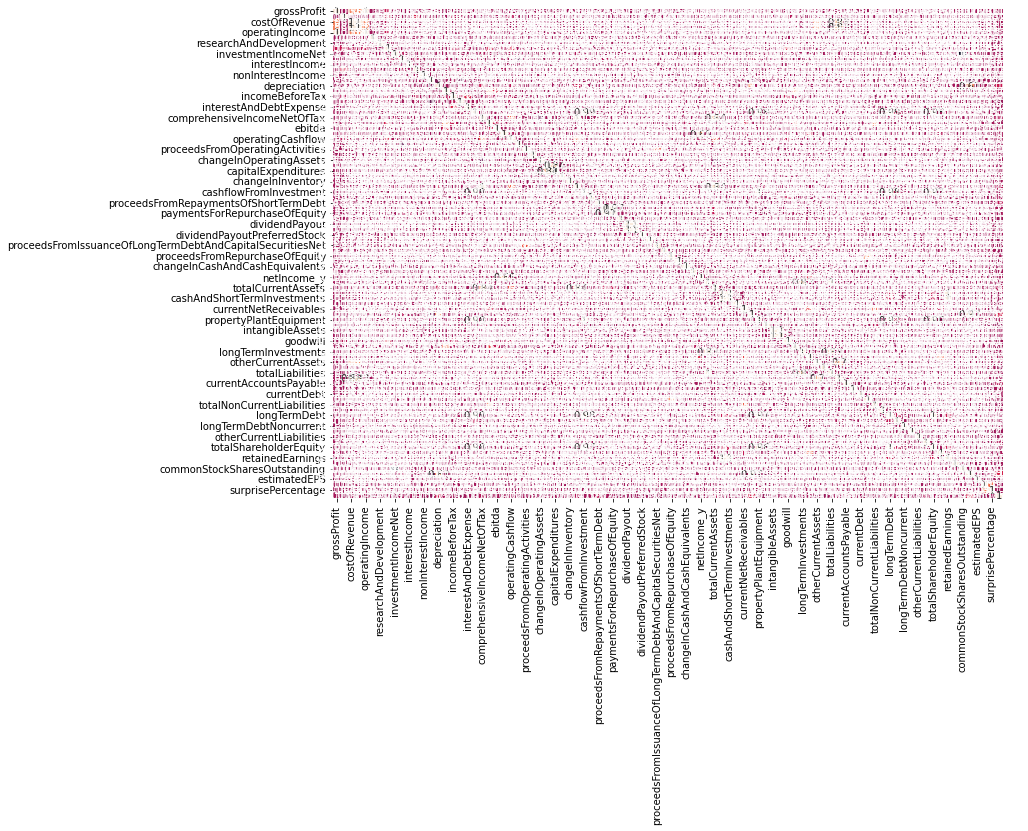

In [14]:
# correlation calculation
feature_corr = final_df.copy().corr()

# Then, print correlation of 'Sale Price' with other features from 'feature_corr' and sort  in descending order
#  ===== YOUR CODE HERE ==========
sortedDesc = feature_corr["1m"].sort_values(ascending=False) 
print(sortedDesc.head(10))

#cf_matrix = confusion_matrix(feature_corr)
plt.figure(figsize = (12,9))
sns.heatmap(feature_corr, annot=True, cbar=False, )

In [15]:
cols_extract = sortedDesc[0: 6].keys()
print(cols_extract)

df_to_export = final_df[cols_extract]
print(df_to_export)

df_to_export.to_csv(r'../data/topFiveFeats211207.csv', sep= ",", index = False)

Index(['1m', 'reportedEPS', 'totalNonCurrentAssets', 'depreciation',
       'proceedsFromRepaymentsOfShortTermDebt', 'currentAccountsPayable'],
      dtype='object')
            1m  reportedEPS  totalNonCurrentAssets  depreciation  \
0     0.033309     0.153846               0.052315      0.024739   
1     0.009163     0.297702               0.215958      0.024739   
2     0.025035    -0.238095               0.019413      0.000000   
3     0.144993     0.856595              -0.027627      0.024739   
4     0.117786    -7.945455              78.018667      0.024739   
...        ...          ...                    ...           ...   
3957  0.129540     0.337349               0.048689      0.024739   
3958  0.029866     0.000000              -0.002830      0.042683   
3959  0.075753     0.189474               0.008627      0.024739   
3960  0.043769    -0.407407              -0.145457      1.061588   
3961 -0.193382     0.047059              -0.199855      0.024739   

      proceedsFro